Notebook Colab Link: https://colab.research.google.com/drive/10uTzHQwv6FxMMWWbc_w48idcSWnHnW4Q?usp=sharing

# **Demand Prediction and Optimization of Capital BikeShare System in Washington, D.C.**

Contributors: Hui Gao, Manyi Hong, Weian Huang, Zheyu Lin



# **1. Introduction**

## i. Background

Bike-sharing systems have become an integral component of urban transportation, offering a sustainable and convenient alternative for both residents and visitors. In Washington, D.C., the Capital Bikeshare (CaBi) program has been pivotal in connecting neighborhoods and reducing reliance on cars.

According to Greater Greater Washington, the CaBi system has experienced a surge in popularity, with ridership reaching record-breaking levels. From October 2023 to October 2024, the number of rides increased by nearly 50 percent, reflecting a growing adoption of bike-sharing as a primary mode of urban transit. This growth is driven by both daily commuters and tourists exploring the city, making CaBi an essential part of Washington's mobility ecosystem.


## ii. Problem Statement

While the growing demand for shared bikes highlights the success of bike-sharing systems, it also introduces operational challenges. The rapid rise in ridership has amplified the complexity of predicting demand and ensuring the availability of bikes across all stations at the right time. This issue is further compounded by diverse user behaviors influenced by time of day, weather, seasons, and station locations. Without effective demand forecasting and resource allocation, users may experience frustration due to bike shortages or docking issues.

This project aims to analyze daily bike rental demand in Washington, D.C., and investigate the impact of various factors, including weather patterns, seasonal trends, and station-specific imbalances. By identifying critical usage patterns and imbalances, this study seeks to provide actionable insights that will help Capital Bikeshare optimize resource distribution, enhance user experience, and maintain its role as a reliable transportation option.


## iii. Project Objectives


**1. Predicting Daily Bike Demands Using Various Models**

Develop predictive models to estimate daily bike demand across seasonal cycles. This will enable Capital Bikeshare to allocate resources effectively, addressing fluctuations and peak usage periods with precision.

**2. Evaluating the Impact of Weather on Demand**

Examine how weather conditions (e.g., temperature, humidity, windspeed) influence bike rental demand. By leveraging weather forecasts, operators can adjust bike distribution to meet user needs and mitigate the impact of adverse conditions.

**3. Optimizing Bike Availability at Peak Locations and Times**

Identify high-demand stations and peak usage hours to ensure bikes and docks are readily available where and when needed most. This will improve user satisfaction, streamline operations, and minimize inefficiencies like over- or under-stocking.


## iv. Possible Stakeholders and Why They Care About This Problem

Possible Stakeholders might include:

1. **Capital Bikeshare Operators and Management:**

Efficiently predicting bike demand and optimizing resource allocation can help reduce operational costs, improve bike availability, and enhance service reliability. This directly impacts their profitability and operational efficiency.

2. **End Users (Residents and Tourists):**

Reliable bike availability at peak times and popular locations improves their overall user experience. This includes reduced waiting times, increased convenience, and satisfaction when using the service.

3. **City Planners and Local Government:**

Effective bike-sharing systems contribute to sustainable urban mobility, reduce traffic congestion, and lower carbon emissions. Insights from this study can support city-wide transportation planning and policy-making.

# **2. Data Sources**

The Capital Bikeshare System Data from Capital Bikeshare provides extensive information on bike-sharing activity in the Washington, D.C., metro area and its neighboring regions.

Source: https://capitalbikeshare.com/system-data , https://www.visualcrossing.com/    

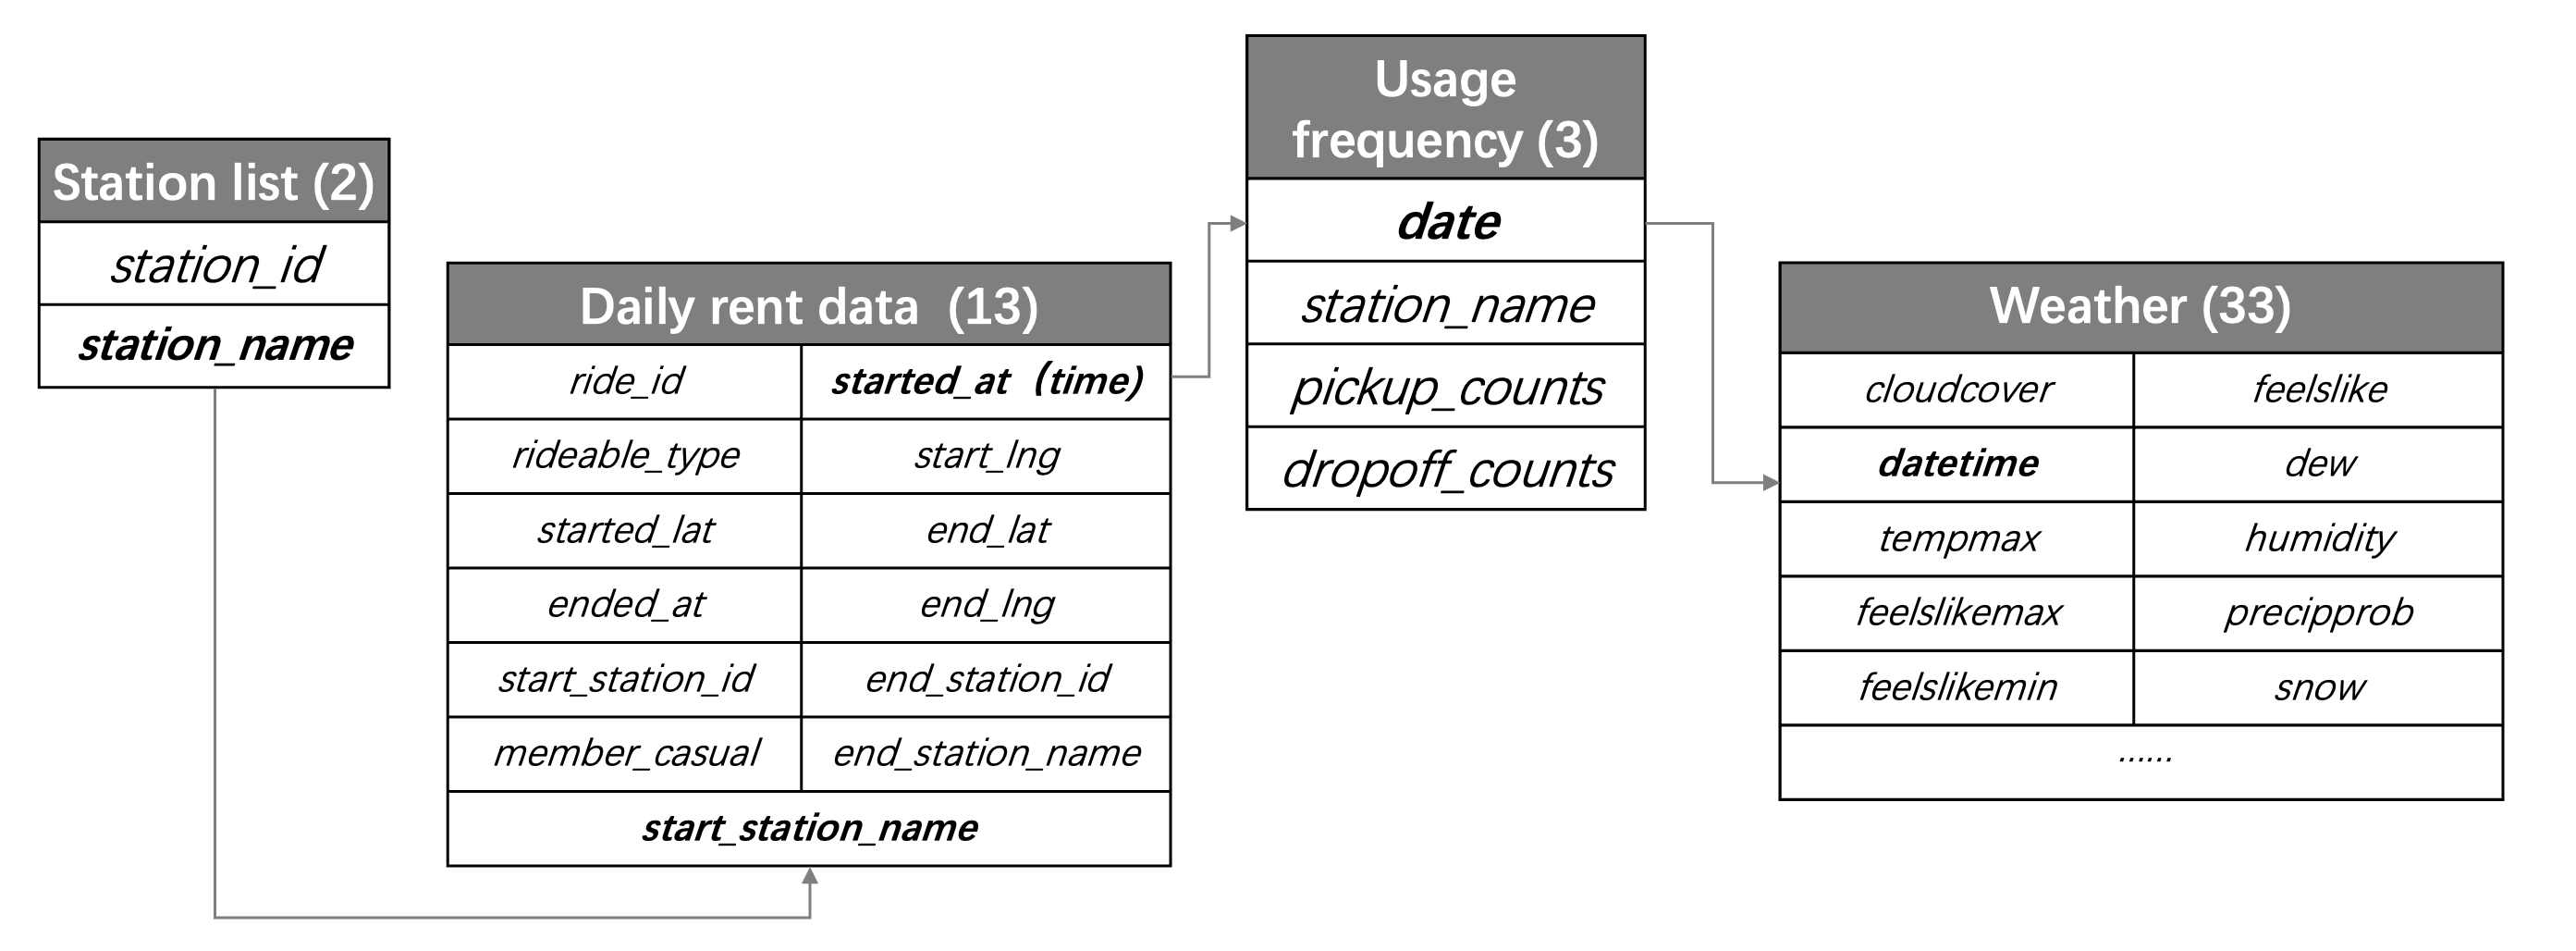

## Data Dictionary

Our dataset comprises four files collected from the Capital Bikeshare system including
five categories of data: usage efficiency, riding type, location, and time, covering the period from March 2020 to
April 2024. The dataset also integrates weather data corresponding to each trip, providing variables like temperature,
humidity, and wind speed. These files include:

 Daily Rent Detail - Contains 16,086,672 rows and 13 columns, including fields such as ride_id,
rideable_type, started_at, ended_at, start_station_name, end_station_name, and member_casual.

 Station List - Contains 916 rows and 2 columns (station_name, station_id).

 Usage Frequency - Contains 873,318 rows and 4 columns (date, station_name, pickup_counts,
dropoff_counts).

 Weather - Contains 1,582 rows and 33 columns, including fields such as date_time, tempmax, tempmin,
temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, snow, and wind.

**Dataset Description**

| File Name    | Description |
| ----------- | ----------- |
|station_list| Station lists|
|usage_frequency| Bike-sharing information of pickup and dropoff|
|weather| Daily weather information in DC|
|daily_rent_detail| Daily rent data 2020/05~2024/08|


- station_list

| Column Name    | Description | Type |
| ----------- | ----------- | ------ |
|station_id| station id | `int64` |
|station_name| station name | `object` |

- Usage frequency

| Column Name    | Description | Type |
| ----------- | ----------- | ------ |
|date | date | `object` |
|station_name | station name | `object` |
|pickup_counts | daily pickup of the station | `int64` |
|dropoff_counts | daily dropoff of the station | `float64` |

- Weather

| Column Name    | Description | Type |
|--------------------|-----------------------------------------------------------------------------------------------|----------|
| name               | Location                                                                                     | `object` |
| datetime           | Date                                                                                         | `object` |
| tempmax            | Maximum temperature at the location.                                                         | `float64`|
| tempmin            | Minimum temperature at the location.                                                         | `float64`|
| temp               | Temperature at the location. Daily values are average values (mean) for the day.             | `float64`|
| feelslikemax       | Maximum feels like temperature at the location.                                              | `float64`|
| feelslikemin       | Minimum feels like temperature at the location.                                              | `float64`|
| feelslike          | What the temperature feels like accounting for heat index or wind chill. Daily values are average values (mean) for the day. | `float64`|
| dew                | Dew point temperature.                                                                       | `float64`|
| humidity           | Relative humidity in %.                                                                      | `float64`|
| precip             | The amount of liquid precipitation that fell or is predicted to fall in the period.          | `float64`|
| precipprob         | The likelihood of measurable precipitation ranging from 0% to 100%.                          | `int64`  |
| precipcover        | The proportion of hours where there was non-zero precipitation.                              | `float64`|
| preciptype         | An array indicating the type(s) of precipitation expected or that occurred.                  | `object` |
| snow               | The amount of snow that fell or is predicted to fall.                                        | `float64`|
| snowdepth          | The depth of snow on the ground.                                                             | `float64`|
| windgust           | Instantaneous wind speed at a location.                                                      | `float64`|
| windspeed          | The sustained wind speed measured as the average windspeed that occurs during the preceding one to two minutes. Daily values are the maximum hourly value for the day. | `float64`|
| winddir            | Direction from which the wind is blowing.                                                    | `float64`|
| sealevelpressure   | The sea level atmospheric or barometric pressure in millibars.                               | `float64`|
| cloudcover         | The sea level atmospheric or barometric pressure in millibars.                               | `float64`|
| visibility         | Distance at which distant objects are visible.                                               | `float64`|
| solarradiation     | (W/m2) The solar radiation power at the instantaneous moment of the observation (or forecast prediction). | `float64`|
| solarenergy        | (MJ/m2) Indicates the total energy from the sun that builds up over a day.                   | `float64`|
| uvindex            | A value between 0 and 10 indicating the level of ultra violet (UV) exposure for that day.     | `int64`  |
| severerisk         | A value between 0 and 100 representing the risk of convective storms.                        | `float64`|
| sunrise            | The formatted time of the sunrise.                                                           | `object` |
| sunset             | The formatted time of the sunset.                                                            | `object` |
| moonphase          | Represents the fractional portion through the current moon lunation cycle ranging from 0 (the new moon) to 0.5 (the full moon) and back to 1 (the next new moon). | `float64`|
| conditions         | Textual representation of the weather conditions.                                            | `object` |
| description        | Longer text descriptions suitable for displaying in weather displays.                        | `object` |
| icon               | A fixed, machine-readable summary that can be used to display an icon.                       | `object` |
| stations           | The weather stations used when collecting a historical observation record.                   | `object` |

- Daily rent data

| Column Name    | Description | Type |
|---------------------|------------------------------------------------------------------------------------------------------|----------|
| ride_id             | Ride ID                                                                                             | `object` |
| rideable_type       | Ride type. I.e. docked_bike, electric_bike, classic_bike                                             | `object` |
| started_at          | Start date and time                                                                                 | `object` |
| ended_at            | End date and time                                                                                   | `object` |
| start_station_name  | Starting station name                                                                               | `object` |
| start_station_id    | Starting station ID                                                                                 | `object` |
| end_station_name    | Ending station name                                                                                 | `object` |
| end_station_id      | Ending station ID                                                                                   | `object` |
| start_lat           | Start latitude                                                                                      | `float64`|
| start_lng           | Start longitude                                                                                     | `float64`|
| end_lat             | End latitude                                                                                        | `float64`|
| end_lng             | End longitude                                                                                       | `float64`|
| member_casual       | Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass). I.e. casual, member | `object` |


# **Whole Processing Graph**

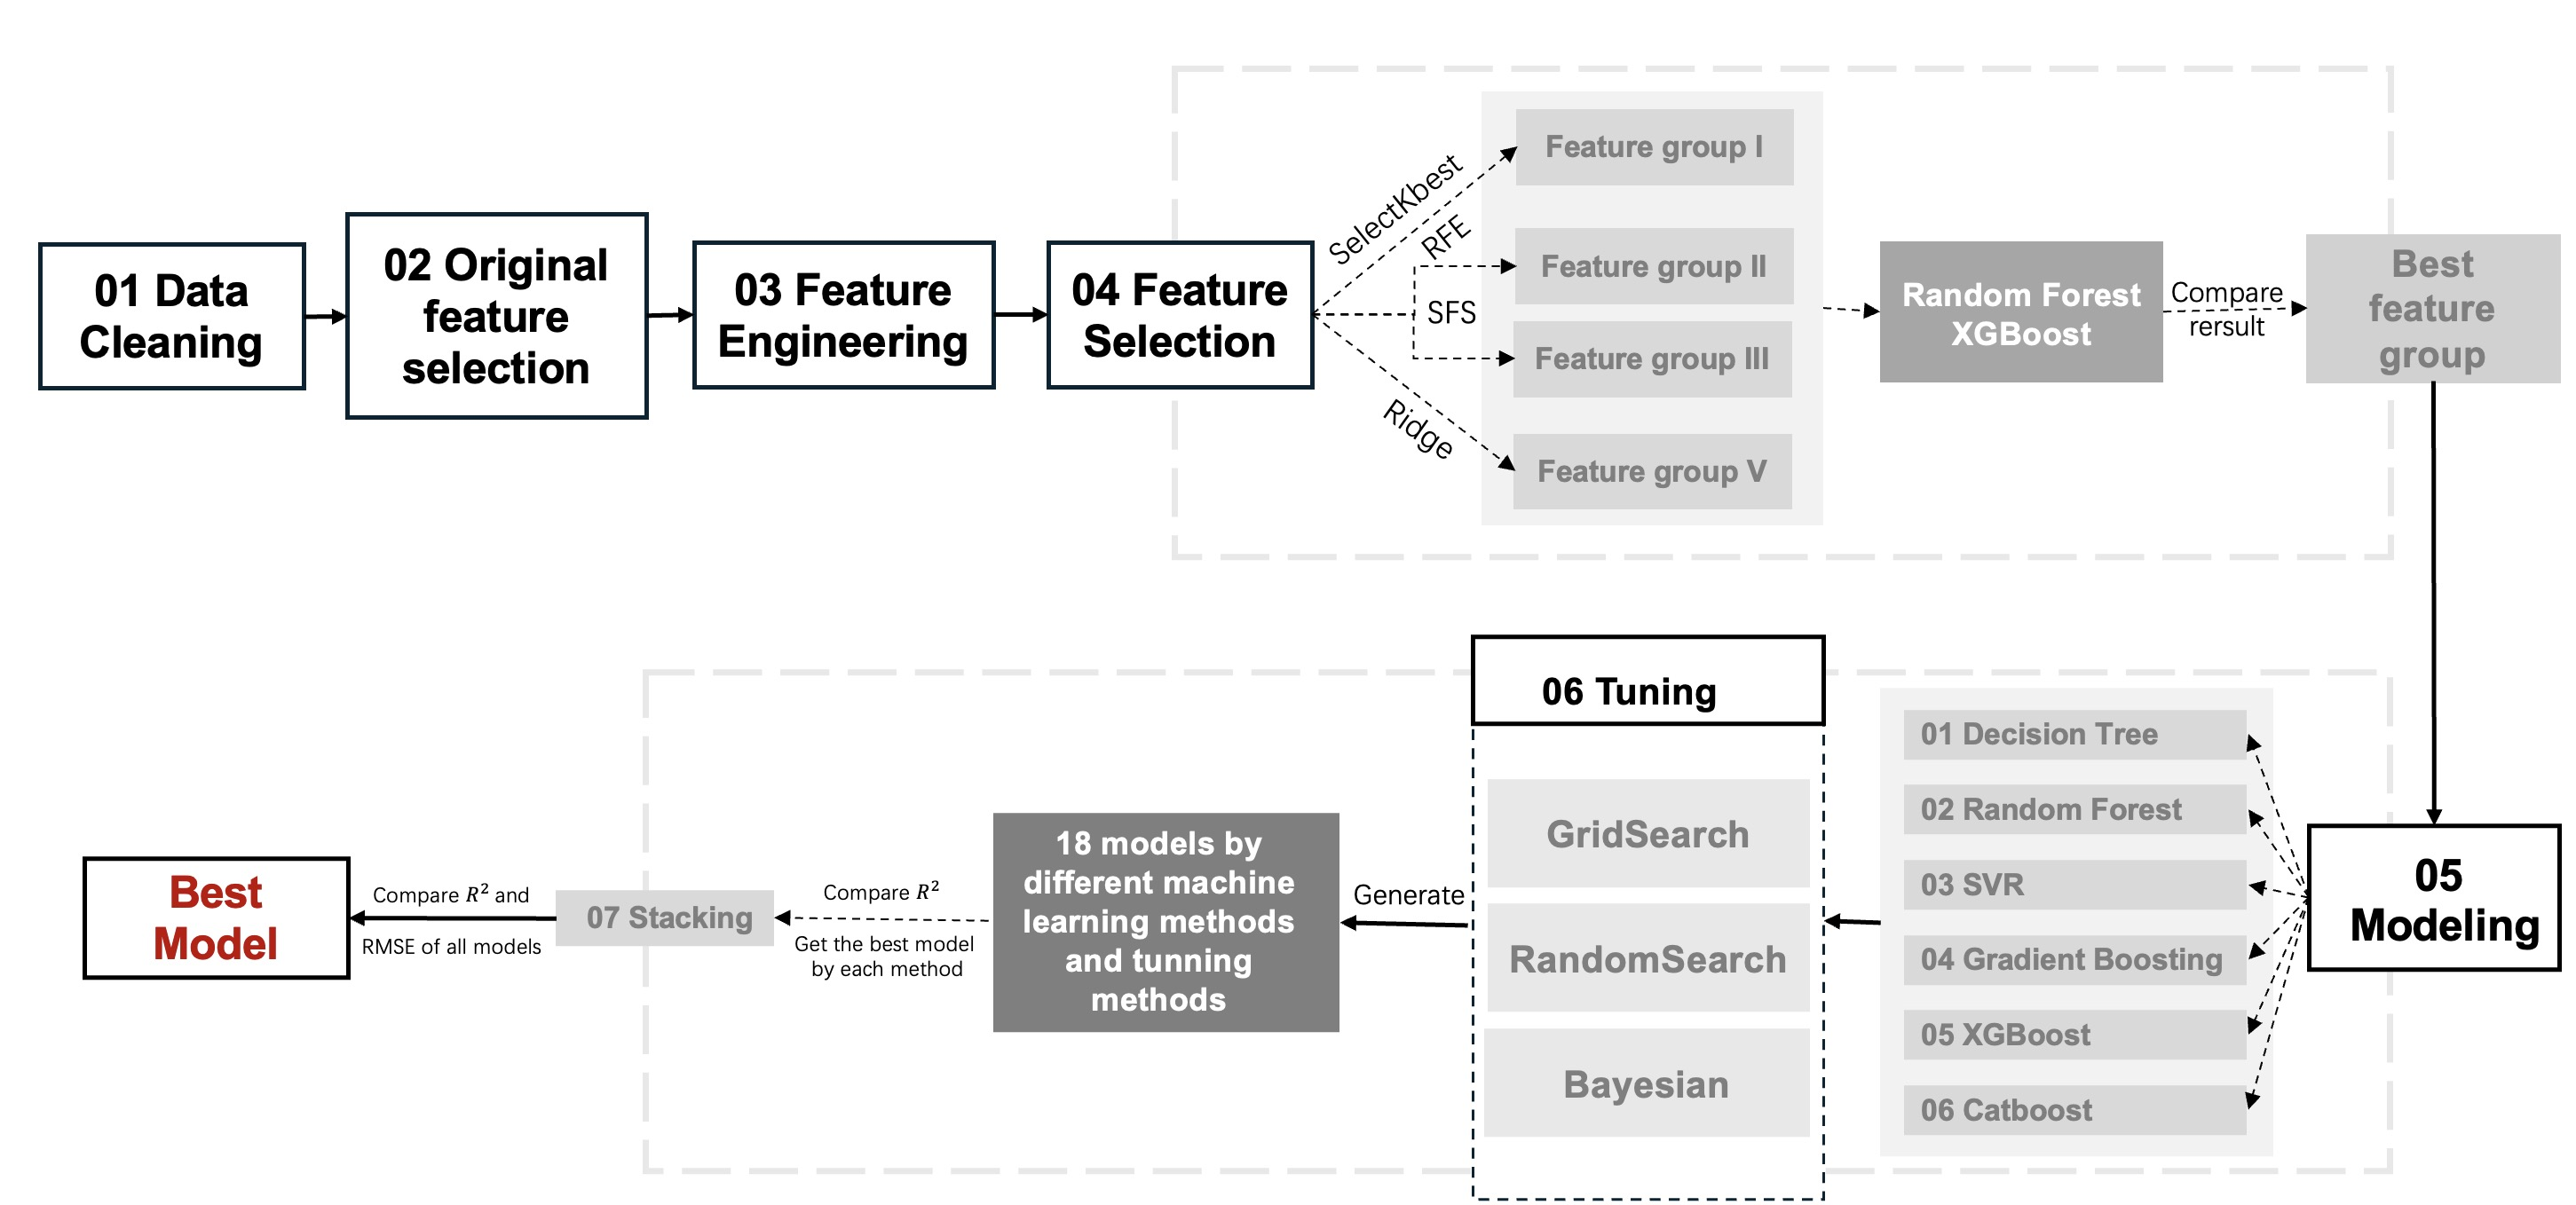

# **3. Data Cleaning**

In [ ]:
from google.cloud import storage
import pandas as pd
import os

In [ ]:
client = storage.Client()

bucket_name = "bike-dataset"
bucket = client.get_bucket(bucket_name)

## i. Load data

### Loading station list data

In [ ]:
file_name = "station_list.csv"

file_path = f"gs://{bucket_name}/{file_name}"
station_list_data = pd.read_csv(file_path)
station_list_df = station_list_data.copy()

station_list_df.head()

,station_id,station_name
0,30200,9th St & Pennsylvania Ave NW
1,30201,9th & G St NW
2,31000,Eads St & 15th St S
3,31001,18th St & S Eads St
4,31002,Crystal Dr & 20th St S


### Loading usage frequency data

In [ ]:
file_name = "usage_frequency.csv"

file_path = f"gs://{bucket_name}/{file_name}"
usage_freq_data = pd.read_csv(file_path)
usage_freq_df = usage_freq_data.copy()

usage_freq_df.head()

,date,station_name,pickup_counts,dropoff_counts
0,2020-05-01,10th & E St NW,11,7.0
1,2020-05-01,10th & Florida Ave NW,8,8.0
2,2020-05-01,10th & G St NW,3,2.0
3,2020-05-01,10th & K St NW,12,15.0
4,2020-05-01,10th & Monroe St NE,5,6.0


### Loading weather data

In [ ]:
file_name = "weather.csv"

file_path = f"gs://{bucket_name}/{file_name}"
weather_data = pd.read_csv(file_path)
weather_df = weather_data.copy()

weather_df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2020-05-01,18.8,11.6,14.9,18.8,11.6,14.9,8.9,69.6,2.607,100,29.17,rain,0.0,0.0,38.9,25.7,321.2,1008.5,66.7,16.0,111.8,9.5,6,NaN,2020-05-01T06:09:41,2020-05-01T20:01:16,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
1,"Washington,DC,USA",2020-05-02,22.1,11.1,16.3,22.1,11.1,16.3,6.4,54.0,0.000,0,0.00,NaN,0.0,0.0,39.6,26.1,246.4,1017.3,30.2,15.9,161.8,14.0,9,NaN,2020-05-02T06:08:30,2020-05-02T20:02:13,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KGAI,KADW,K..."
2,"Washington,DC,USA",2020-05-03,24.9,15.6,18.6,24.9,15.6,18.6,13.4,72.5,10.234,100,16.67,rain,0.0,0.0,46.8,21.4,193.9,1010.2,71.7,15.2,67.2,5.7,4,NaN,2020-05-03T06:07:21,2020-05-03T20:03:11,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
3,"Washington,DC,USA",2020-05-04,23.8,14.3,19.2,23.8,14.3,19.2,7.8,53.8,15.555,100,12.50,rain,0.0,0.0,68.8,44.9,317.0,1009.1,50.3,15.2,152.5,13.3,8,NaN,2020-05-04T06:06:12,2020-05-04T20:04:08,0.40,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
4,"Washington,DC,USA",2020-05-05,14.3,9.3,12.3,14.3,8.0,12.1,3.3,55.6,4.488,100,16.67,rain,0.0,0.0,28.4,24.0,350.2,1014.5,81.0,15.2,57.0,5.0,2,NaN,2020-05-05T06:05:06,2020-05-05T20:05:05,0.44,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"KIAD,KDCA,72405013743,72403793728,72403093738,..."


### Loading daily rent detail data

In [ ]:
file_name = "daily_rent_detail.csv"

file_path = f"gs://{bucket_name}/{file_name}"
daily_rent_detail_data = pd.read_csv(file_path, dtype={'start_station_id': str, 'end_station_id': str})
daily_rent_detail_df = daily_rent_detail_data.copy()

daily_rent_detail_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


## ii. Handling Missing Values

### Handling missing values for station list data

In [ ]:
station_list_df.head()

,station_id,station_name
0,30200,9th St & Pennsylvania Ave NW
1,30201,9th & G St NW
2,31000,Eads St & 15th St S
3,31001,18th St & S Eads St
4,31002,Crystal Dr & 20th St S


In [ ]:
station_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   station_id    916 non-null    int64 
 1   station_name  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [ ]:
station_list_df.isnull().sum()

station_id      0
station_name    0
dtype: int64

### Handling missing values for usage frequency data

In [ ]:
usage_freq_df.head()

,date,station_name,pickup_counts,dropoff_counts
0,2020-05-01,10th & E St NW,11,7.0
1,2020-05-01,10th & Florida Ave NW,8,8.0
2,2020-05-01,10th & G St NW,3,2.0
3,2020-05-01,10th & K St NW,12,15.0
4,2020-05-01,10th & Monroe St NE,5,6.0


In [ ]:
usage_freq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873318 entries, 0 to 873317
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            873318 non-null  object 
 1   station_name    873318 non-null  object 
 2   pickup_counts   873318 non-null  int64  
 3   dropoff_counts  873318 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.7+ MB


In [ ]:
usage_freq_df.isnull().sum()

date              0
station_name      0
pickup_counts     0
dropoff_counts    0
dtype: int64

### Handling missing values for weather data

In [ ]:
weather_df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2020-05-01,18.8,11.6,14.9,18.8,11.6,14.9,8.9,69.6,2.607,100,29.17,rain,0.0,0.0,38.9,25.7,321.2,1008.5,66.7,16.0,111.8,9.5,6,NaN,2020-05-01T06:09:41,2020-05-01T20:01:16,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
1,"Washington,DC,USA",2020-05-02,22.1,11.1,16.3,22.1,11.1,16.3,6.4,54.0,0.000,0,0.00,NaN,0.0,0.0,39.6,26.1,246.4,1017.3,30.2,15.9,161.8,14.0,9,NaN,2020-05-02T06:08:30,2020-05-02T20:02:13,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KGAI,KADW,K..."
2,"Washington,DC,USA",2020-05-03,24.9,15.6,18.6,24.9,15.6,18.6,13.4,72.5,10.234,100,16.67,rain,0.0,0.0,46.8,21.4,193.9,1010.2,71.7,15.2,67.2,5.7,4,NaN,2020-05-03T06:07:21,2020-05-03T20:03:11,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
3,"Washington,DC,USA",2020-05-04,23.8,14.3,19.2,23.8,14.3,19.2,7.8,53.8,15.555,100,12.50,rain,0.0,0.0,68.8,44.9,317.0,1009.1,50.3,15.2,152.5,13.3,8,NaN,2020-05-04T06:06:12,2020-05-04T20:04:08,0.40,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
4,"Washington,DC,USA",2020-05-05,14.3,9.3,12.3,14.3,8.0,12.1,3.3,55.6,4.488,100,16.67,rain,0.0,0.0,28.4,24.0,350.2,1014.5,81.0,15.2,57.0,5.0,2,NaN,2020-05-05T06:05:06,2020-05-05T20:05:05,0.44,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"KIAD,KDCA,72405013743,72403793728,72403093738,..."


In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1584 non-null   object 
 1   datetime          1584 non-null   object 
 2   tempmax           1584 non-null   float64
 3   tempmin           1584 non-null   float64
 4   temp              1584 non-null   float64
 5   feelslikemax      1584 non-null   float64
 6   feelslikemin      1584 non-null   float64
 7   feelslike         1584 non-null   float64
 8   dew               1584 non-null   float64
 9   humidity          1584 non-null   float64
 10  precip            1584 non-null   float64
 11  precipprob        1584 non-null   int64  
 12  precipcover       1584 non-null   float64
 13  preciptype        757 non-null    object 
 14  snow              1584 non-null   float64
 15  snowdepth         1584 non-null   float64
 16  windgust          1584 non-null   float64


In [ ]:
weather_df.isnull().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          827
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          619
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [ ]:
# Look at the percentage of missing values
missing_percentage = round((weather_df.isnull().sum() / len(weather_df)) * 100,2)
print(f'missing_percentage:\n{missing_percentage}')

missing_percentage:
name                 0.00
datetime             0.00
tempmax              0.00
tempmin              0.00
temp                 0.00
feelslikemax         0.00
feelslikemin         0.00
feelslike            0.00
dew                  0.00
humidity             0.00
precip               0.00
precipprob           0.00
precipcover          0.00
preciptype          52.21
snow                 0.00
snowdepth            0.00
windgust             0.00
windspeed            0.00
winddir              0.00
sealevelpressure     0.00
cloudcover           0.00
visibility           0.00
solarradiation       0.00
solarenergy          0.00
uvindex              0.00
severerisk          39.08
sunrise              0.00
sunset               0.00
moonphase            0.00
conditions           0.00
description          0.00
icon                 0.00
stations             0.00
dtype: float64


In [ ]:
# Since the 'severerisk' might be helpful in our further analysis, instead of dropping missing values, we choose to label them as -1
weather_df['severerisk'] = weather_df['severerisk'].fillna(-1)

In [ ]:
# For 'preciptype', we transform the missing values to 'unknown'
weather_df['preciptype'] = weather_df['preciptype'].fillna('unknown')

### Handling missing values for daily rent detail data

In [ ]:
daily_rent_detail_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


In [ ]:
daily_rent_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16086672 entries, 0 to 16086671
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.6+ GB


In [ ]:
daily_rent_detail_df.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1450150
start_station_id      1450150
end_station_name      1558268
end_station_id        1558917
start_lat                  10
start_lng                  10
end_lat                 25929
end_lng                 25929
member_casual               0
dtype: int64

In [ ]:
missing_percentage = round((daily_rent_detail_df.isnull().sum() / len(daily_rent_detail_df)) * 100,2)
print(f'missing_percentage:\n{missing_percentage}')

missing_percentage:
ride_id               0.00
rideable_type         0.00
started_at            0.00
ended_at              0.00
start_station_name    9.01
start_station_id      9.01
end_station_name      9.69
end_station_id        9.69
start_lat             0.00
start_lng             0.00
end_lat               0.16
end_lng               0.16
member_casual         0.00
dtype: float64


In [ ]:
daily_rent_detail_df = daily_rent_detail_df.dropna(how='any', subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

#### Filing missing values for station name using lat/lng

After that, we try to fill the missing values of start station names and start station ids using latitude and longititude.

In [ ]:
daily_rent_detail_df['rounded_lat'] = daily_rent_detail_df['start_lat'].round(4)
daily_rent_detail_df['rounded_lng'] = daily_rent_detail_df['start_lng'].round(4)

inferred_station_name = (daily_rent_detail_df
                         .groupby(['rounded_lat', 'rounded_lng'])['start_station_name']
                         .agg(lambda x: x.dropna().value_counts().idxmax() if not x.dropna().empty else None)
                         .reset_index())

daily_rent_detail_df = daily_rent_detail_df.merge(inferred_station_name,
                                                  on=['rounded_lat', 'rounded_lng'],
                                                  how='left',
                                                  suffixes=('', '_inferred'))

daily_rent_detail_df['start_station_name'] = daily_rent_detail_df['start_station_name'].fillna(daily_rent_detail_df['start_station_name_inferred'])

daily_rent_detail_df.drop(columns=['rounded_lat', 'rounded_lng', 'start_station_name_inferred'], inplace=True)

In [ ]:
start_station_list_df = station_list_df.copy()
start_station_list_df.rename(columns={'station_id': 'start_station_id', 'station_name': 'start_station_name'}, inplace=True)

daily_rent_detail_df = daily_rent_detail_df.merge(
    start_station_list_df,
    how='left',
    on='start_station_name',
    suffixes=('', '_y')
)

daily_rent_detail_df['start_station_id'] = daily_rent_detail_df['start_station_id_y']
daily_rent_detail_df.drop(columns=['start_station_id_y'], inplace=True)

Then we do the same thing to fill the missing values of end station.

In [ ]:

daily_rent_detail_df['rounded_lat'] = daily_rent_detail_df['end_lat'].round(4)
daily_rent_detail_df['rounded_lng'] = daily_rent_detail_df['end_lng'].round(4)

inferred_station_name = (daily_rent_detail_df
                         .groupby(['rounded_lat', 'rounded_lng'])['end_station_name']
                         .agg(lambda x: x.dropna().value_counts().idxmax() if not x.dropna().empty else None)
                         .reset_index())

daily_rent_detail_df = daily_rent_detail_df.merge(inferred_station_name,
                                                  on=['rounded_lat', 'rounded_lng'],
                                                  how='left',
                                                  suffixes=('', '_inferred'))

daily_rent_detail_df['end_station_name'] = daily_rent_detail_df['end_station_name'].fillna(daily_rent_detail_df['end_station_name_inferred'])

daily_rent_detail_df.drop(columns=['rounded_lat', 'rounded_lng', 'end_station_name_inferred'], inplace=True)

In [ ]:
end_station_list_df = station_list_df.copy()
end_station_list_df.rename(columns={'station_id': 'end_station_id', 'station_name': 'end_station_name'}, inplace=True)

daily_rent_detail_df = daily_rent_detail_df.merge(
    end_station_list_df,
    how='left',
    on='end_station_name',
    suffixes=('', '_y')
)

daily_rent_detail_df['end_station_id'] = daily_rent_detail_df['end_station_id_y']
daily_rent_detail_df.drop(columns=['end_station_id_y'], inplace=True)

In [ ]:
daily_rent_detail_df.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1368865
start_station_id      1372071
end_station_name       471794
end_station_id         474518
start_lat                   0
start_lng                   0
end_lat                     0
end_lng                     0
member_casual               0
dtype: int64

In [ ]:
missing_percentage = round((daily_rent_detail_df.isnull().sum() / len(daily_rent_detail_df)) * 100,2)
print(f'missing_percentage:\n{missing_percentage}')

missing_percentage:
ride_id               0.00
rideable_type         0.00
started_at            0.00
ended_at              0.00
start_station_name    8.47
start_station_id      8.49
end_station_name      2.92
end_station_id        2.94
start_lat             0.00
start_lng             0.00
end_lat               0.00
end_lng               0.00
member_casual         0.00
dtype: float64


In [ ]:
daily_rent_detail_df.dropna(how='any', inplace=True)

## iii. Changing Data type

In [ ]:
usage_freq_df['date'] = pd.to_datetime(usage_freq_df['date'])
usage_freq_df['dropoff_counts'] = usage_freq_df['dropoff_counts'].astype(int)

weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
weather_df['preciptype'] = weather_df['preciptype'].astype('category')
weather_df['sunrise'] = pd.to_datetime(weather_df['sunrise'])
weather_df['sunset'] = pd.to_datetime(weather_df['sunset'])
weather_df['conditions'] = weather_df['conditions'].astype('category')
weather_df['icon'] = weather_df['icon'].astype('category')

daily_rent_detail_df['rideable_type'] = daily_rent_detail_df['rideable_type'].astype('category')
daily_rent_detail_df['member_casual'] = daily_rent_detail_df['member_casual'].astype('category')

daily_rent_detail_df['started_at'] = daily_rent_detail_df['started_at'].str.split('.').str[0]
daily_rent_detail_df['started_at'] = pd.to_datetime(daily_rent_detail_df['started_at'])

daily_rent_detail_df['ended_at'] = daily_rent_detail_df['ended_at'].str.split('.').str[0]
daily_rent_detail_df['ended_at'] = pd.to_datetime(daily_rent_detail_df['ended_at'])


#### After changing the data type, we review and handle any obviously unreasonable data.

In [ ]:
inconsistent_time = daily_rent_detail_df[daily_rent_detail_df['started_at'] > daily_rent_detail_df['ended_at']]
print(inconsistent_time[['started_at', 'ended_at']])

                  started_at            ended_at
278      2020-05-24 18:58:35 2020-05-24 18:58:19
420      2020-05-30 13:17:14 2020-05-30 13:17:01
487      2020-05-25 14:59:49 2020-05-25 14:59:36
534      2020-05-19 14:49:41 2020-05-19 14:49:28
537      2020-05-27 20:06:18 2020-05-27 20:06:06
...                      ...                 ...
14319369 2024-05-10 09:39:42 2024-05-10 09:39:37
14320104 2024-05-08 16:00:03 2024-05-08 16:00:00
14324556 2024-05-12 01:26:04 2024-05-12 01:26:03
14339335 2024-05-29 17:25:06 2024-05-29 17:25:04
14355297 2024-05-05 02:37:11 2024-05-05 02:31:16

[7812 rows x 2 columns]


In [ ]:
daily_rent_detail_df = daily_rent_detail_df[daily_rent_detail_df['started_at'] <= daily_rent_detail_df['ended_at']]

## iv. Examine potential outliers

In [ ]:
pd.set_option('display.max_columns', None)
print(weather_df.describe())

                  datetime      tempmax      tempmin         temp  \
count                 1584  1584.000000  1584.000000  1584.000000   
mean   2022-07-01 12:00:00    20.924306    12.025568    16.238826   
min    2020-05-01 00:00:00    -6.200000   -12.900000    -9.700000   
25%    2021-05-31 18:00:00    13.300000     4.300000     8.700000   
50%    2022-07-01 12:00:00    22.100000    12.600000    16.650000   
75%    2023-08-01 06:00:00    28.800000    20.400000    24.325000   
max    2024-08-31 00:00:00    39.300000    27.500000    32.700000   
std                    NaN     9.264769     8.818640     8.841132   

       feelslikemax  feelslikemin    feelslike          dew     humidity  \
count   1584.000000   1584.000000  1584.000000  1584.000000  1584.000000   
mean      21.144886     10.677273    15.700442     8.706313    63.758270   
min      -11.100000    -20.200000   -16.400000   -19.200000    24.300000   
25%       13.300000      1.600000     7.500000     0.600000    54.300000  

## v. Inspect for duplicate rows

In [ ]:
weather_duplicates = weather_df.duplicated()
print(f"Number of duplicate rows from weather data: {weather_duplicates.sum()}")

usage_duplicated = usage_freq_df.duplicated()
print(f"Number of duplicate rows from usage data: {usage_duplicated.sum()}")

daily_rent_duplicates = daily_rent_detail_df.duplicated()
print(f"Number of duplicate rows from rent data: {daily_rent_duplicates.sum()}")

station_duplicates = station_list_df.duplicated()
print(f"Number of duplicate rows from station list data: {station_duplicates.sum()}")

Number of duplicate rows from weather data: 0
Number of duplicate rows from usage data: 0
Number of duplicate rows from rent data: 101
Number of duplicate rows from station list data: 0


In [ ]:
daily_rent_detail_df = daily_rent_detail_df.drop_duplicates()

## vi. Check the cleaned data

In [ ]:
print(station_list_df.info())
print(usage_freq_df.info())
print(daily_rent_detail_df.info())
print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   station_id    916 non-null    int64 
 1   station_name  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873318 entries, 0 to 873317
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            873318 non-null  datetime64[ns]
 1   station_name    873318 non-null  object        
 2   pickup_counts   873318 non-null  int64         
 3   dropoff_counts  873318 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 14587106 entries, 0 to 16155317
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------        

In [ ]:
columns_to_drop = ['name',
    'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike',
    'dew',  'precipcover',
    'preciptype','snowdepth',
    'winddir', 'sealevelpressure',
    'solarradiation', 'solarenergy', 'uvindex',
    'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'stations'
]

weather_df = weather_df.drop(columns=columns_to_drop)

print(weather_df.head())

    datetime  temp  humidity  precip  precipprob  snow  windgust  windspeed  \
0 2020-05-01  14.9      69.6   2.607         100   0.0      38.9       25.7   
1 2020-05-02  16.3      54.0   0.000           0   0.0      39.6       26.1   
2 2020-05-03  18.6      72.5  10.234         100   0.0      46.8       21.4   
3 2020-05-04  19.2      53.8  15.555         100   0.0      68.8       44.9   
4 2020-05-05  12.3      55.6   4.488         100   0.0      28.4       24.0   

   cloudcover  visibility  severerisk               icon  
0        66.7        16.0        -1.0               rain  
1        30.2        15.9        -1.0  partly-cloudy-day  
2        71.7        15.2        -1.0               rain  
3        50.3        15.2        -1.0               rain  
4        81.0        15.2        -1.0               rain  


# **4. Feature engineering**

In [ ]:
usage_freq_df

,date,station_name,pickup_counts,dropoff_counts
0,2020-05-01,10th & E St NW,11,7
1,2020-05-01,10th & Florida Ave NW,8,8
2,2020-05-01,10th & G St NW,3,2
3,2020-05-01,10th & K St NW,12,15
4,2020-05-01,10th & Monroe St NE,5,6
...,...,...,...,...
873313,2024-08-31,Wisconsin Ave & Upton St NW,28,26
873314,2024-08-31,Woodglen Dr & Executive Blvd,4,1
873315,2024-08-31,Woodley Park Metro / Calvert St & Connecticut ...,34,34
873316,2024-08-31,Woodmont Ave & Strathmore St,10,7


#### Ensures that the time-related columns uniformly converted to the datetime type.

In [ ]:
import pandas as pd
import numpy as np
usage_freq_df['date'] = pd.to_datetime(usage_freq_df['date'])
daily_rent_detail_df['started_at'] = pd.to_datetime(daily_rent_detail_df['started_at'])
daily_rent_detail_df['ended_at'] = pd.to_datetime(daily_rent_detail_df['ended_at'])
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

### i. Create a dataframe to groupby the pickup_counts by date

In [ ]:
final_df = usage_freq_df.groupby('date', as_index=False).agg(total_pickup=('pickup_counts', 'sum'))
print(final_df)

final_df.to_csv('final_df.csv', index=False)


           date  total_pickup
0    2020-05-01          2969
1    2020-05-02          9028
2    2020-05-03          3663
3    2020-05-04          3718
4    2020-05-05          2374
...         ...           ...
1579 2024-08-27         17540
1580 2024-08-28         16635
1581 2024-08-29         12667
1582 2024-08-30         13992
1583 2024-08-31         16748

[1584 rows x 2 columns]


### ii. Create feature: is_weekend, season, is_holiday (table:usagefrequency)

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()
holiday_list = calendar.holidays(start=final_df['date'].min(), end=final_df['date'].max()).to_pydatetime()
final_df['is_holiday'] = final_df['date'].dt.date.isin([h.date() for h in holiday_list]).astype(int)
final_df['is_weekend'] = final_df['date'].dt.dayofweek.isin([5, 6]).astype(int)
final_df['season'] = (final_df['date'].dt.month % 12 + 3) // 3  # 1=spring, 2=summer, 3=autumn, 4=winter

### iii. Create feature: time_period, is_peak, duration(table:daily_rent detail)

In [ ]:
# Create peak time period features: is_peak,duration,time_period
def categorize_time(hour):
    if 5 <= hour < 11:
        return "morning"
    elif 11 <= hour < 17:
        return "afternoon"
    elif 17 <= hour < 24:
        return "night"
    else:
        return "midnight"

#create time_period
daily_rent_detail_df['start_hour'] = daily_rent_detail_df['started_at'].dt.hour
daily_rent_detail_df['time_period'] = daily_rent_detail_df['start_hour'].apply(categorize_time)

# Create is_peak
daily_rent_detail_df['hour'] = daily_rent_detail_df['started_at'].dt.hour
daily_rent_detail_df['is_morning_peak'] = daily_rent_detail_df['hour'].between(7, 9).astype(int)  # 7:00 AM - 9:59 AM
daily_rent_detail_df['is_evening_peak'] = daily_rent_detail_df['hour'].between(17, 19).astype(int)  # 5:00 PM - 7:59 PM
daily_rent_detail_df['is_peak'] = (
    daily_rent_detail_df['is_morning_peak'] | daily_rent_detail_df['is_evening_peak']
).astype(int)

# Create duration
daily_rent_detail_df['duration'] = (daily_rent_detail_df['ended_at'] - daily_rent_detail_df['started_at']).dt.total_seconds() / 60

### iv. Create unify ID for usage_freq_df

#### a. Merge usage_frequency and station_list so that ensure usage_freq_df has station_id

In [ ]:
usage_freq_df = usage_freq_df.merge(station_list_df, on='station_name', how='left')

#### b. Handle missing value

In [ ]:
missing_values = usage_freq_df.isnull().sum()
print(missing_values)

date                0
station_name        0
pickup_counts       0
dropoff_counts      0
is_holiday          0
is_weekend          0
season              0
station_id        825
dtype: int64


In [ ]:
usage_freq_df = usage_freq_df[~usage_freq_df['station_id'].isna()]

#### c. Create ID

In [ ]:
# Create id
usage_freq_df['station_id'] = usage_freq_df['station_id'].astype(int)
usage_freq_df['id'] = (
    usage_freq_df['date'].dt.strftime('%Y%m%d') + usage_freq_df['station_id'].astype(str)
)
# change the id to the first column
columns = ['id'] + [col for col in usage_freq_df.columns if col != 'id']
usage_freq_df = usage_freq_df[columns]
usage_freq_df.head()

,id,date,station_name,pickup_counts,dropoff_counts,is_holiday,is_weekend,season,station_id
0,2020050131256,2020-05-01,10th & E St NW,11,7,0,0,2,31256
1,2020050131120,2020-05-01,10th & Florida Ave NW,8,8,0,0,2,31120
2,2020050131274,2020-05-01,10th & G St NW,3,2,0,0,2,31274
3,2020050131263,2020-05-01,10th & K St NW,12,15,0,0,2,31263
4,2020050131504,2020-05-01,10th & Monroe St NE,5,6,0,0,2,31504


### v. Create Unify ID for daliy_rent_detail

In [ ]:
daily_rent_detail_df['start_station_id'] = daily_rent_detail_df['start_station_id'].astype(int)
daily_rent_detail_df['start_date'] = daily_rent_detail_df['started_at'].dt.strftime('%Y%m%d')
daily_rent_detail_df['id'] = (
    daily_rent_detail_df['start_date'] + daily_rent_detail_df['start_station_id'].astype(str)
)

In [ ]:
# change the id to the first column
columns = ['id'] + [col for col in daily_rent_detail_df.columns if col != 'id']
daily_rent_detail_df = daily_rent_detail_df[columns]
daily_rent_detail_df.head()

,id,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date
0,2020053031804,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual,20200530
1,2020050931256,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member,20200509
2,2020052431305,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member,20200524
3,2020052731305,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual,20200527
4,2020053131419,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual,20200531


## vi. Merging dataset

 ### a. Merge usage_frequency with weather to usage_weather_df

In [ ]:
usage_freq_df['date'] = pd.to_datetime(usage_freq_df['date'])
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

usage_weather_df = usage_freq_df.merge(
    weather_df,
    left_on='date',
    right_on='datetime',
    how='left'
)

usage_weather_df.drop(columns=['datetime'], inplace=True)


usage_weather_df.head()


,date,station_name,pickup_counts,dropoff_counts,temp,humidity,precip,precipprob,snow,windgust,windspeed,cloudcover,visibility,severerisk,icon
0,2020-05-01,10th & E St NW,11,7,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain
1,2020-05-01,10th & Florida Ave NW,8,8,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain
2,2020-05-01,10th & G St NW,3,2,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain
3,2020-05-01,10th & K St NW,12,15,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain
4,2020-05-01,10th & Monroe St NE,5,6,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain


### b. Merge daily_rent_detail with usage_weather_df to process_data_df

#### Treate each station every day as a record, unify the record by aggregate statistical features to a new table: daily_rent_detail_summary

In [ ]:
daily_rent_detail_summary = daily_rent_detail_df.groupby('id').agg(
    morning_pickups=('time_period', lambda x: (x == 'morning').sum()),  # morning order
    afternoon_pickups=('time_period', lambda x: (x == 'afternoon').sum()),  # afternoon order
    night_pickups=('time_period', lambda x: (x == 'night').sum()),  # night order
    midnight_pickups=('time_period', lambda x: (x == 'midnight').sum()),  # midnight order
    total_rentals=('ride_id', 'count')  # total order
).reset_index()
# change the column name to "date"
daily_rent_detail_summary.rename(columns={'started_at': 'date'}, inplace=True)

In [ ]:
daily_rent_detail_summary.head()

,id,morning_pickups,afternoon_pickups,night_pickups,midnight_pickups,total_rentals
0,2020050131000,0,2,2,0,4
1,2020050131002,2,3,1,0,6
2,2020050131003,1,6,1,0,8
3,2020050131005,0,3,3,0,6
4,2020050131006,0,6,1,0,7


#### Merge rental_summary with usage_weather_df to process_df

In [ ]:
process_df = usage_weather_df.merge(
    daily_rent_detail_summary,
    on='id',
    how='inner'
)

process_df.to_csv("processed_data.csv", index=False)


In [ ]:
process_df.head()

,id,date,station_name,pickup_counts,dropoff_counts,station_id,temp,humidity,precip,precipprob,snow,windgust,windspeed,cloudcover,visibility,severerisk,icon,morning_pickups,afternoon_pickups,night_pickups,midnight_pickups,total_rentals
0,2020050131256,2020-05-01,10th & E St NW,11,7,31256,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain,1,5,5,0,11
1,2020050131120,2020-05-01,10th & Florida Ave NW,8,8,31120,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain,1,4,2,0,7
2,2020050131274,2020-05-01,10th & G St NW,3,2,31274,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain,0,1,2,0,3
3,2020050131263,2020-05-01,10th & K St NW,12,15,31263,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain,0,9,3,0,12
4,2020050131504,2020-05-01,10th & Monroe St NE,5,6,31504,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain,0,3,2,0,5


### Check new feature

In [ ]:
final_df.head()

,date,total_pickup,is_holiday,is_weekend,season
0,2020-05-01,2969,0,0,2
1,2020-05-02,9028,0,1,2
2,2020-05-03,3663,0,1,2
3,2020-05-04,3718,0,0,2
4,2020-05-05,2374,0,0,2


### c. Merge the usage_df together with weather dataset to final_df

In [ ]:
weather_df.rename(columns={'datetime': 'date'}, inplace=True)

final_df = final_df.merge(weather_df, on='date', how='left')

final_df.to_csv('final_df.csv', index=False)

In [ ]:
final_df

,date,total_pickup,is_holiday,is_weekend,season,temp,humidity,precip,precipprob,snow,windgust,windspeed,cloudcover,visibility,severerisk,icon
0,2020-05-01,2969,0,0,2,14.9,69.6,2.607,100,0.0,38.9,25.7,66.7,16.0,-1.0,rain
1,2020-05-02,9028,0,1,2,16.3,54.0,0.000,0,0.0,39.6,26.1,30.2,15.9,-1.0,partly-cloudy-day
2,2020-05-03,3663,0,1,2,18.6,72.5,10.234,100,0.0,46.8,21.4,71.7,15.2,-1.0,rain
3,2020-05-04,3718,0,0,2,19.2,53.8,15.555,100,0.0,68.8,44.9,50.3,15.2,-1.0,rain
4,2020-05-05,2374,0,0,2,12.3,55.6,4.488,100,0.0,28.4,24.0,81.0,15.2,-1.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2024-08-27,17540,0,0,3,27.7,62.4,0.000,0,0.0,18.4,17.0,40.4,15.1,10.0,partly-cloudy-day
1580,2024-08-28,16635,0,0,3,30.2,58.7,0.000,0,0.0,38.9,23.1,70.3,16.0,10.0,partly-cloudy-day
1581,2024-08-29,12667,0,0,3,28.1,69.7,12.655,100,0.0,27.7,23.3,73.8,14.9,60.0,rain
1582,2024-08-30,13992,0,0,3,22.9,87.6,6.238,100,0.0,18.4,19.8,99.2,12.8,10.0,rain


# **5. EDA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
processed_data= pd.read_csv('processed_data.csv')

## i. Time Factors

### a. Seasonal trends

In [ ]:
seasonal_trends = processed_data.groupby(['date', 'season']).agg(total_rentals=('total_rentals', 'sum')).reset_index()

In [ ]:
seasonal_avg_rentals = seasonal_trends.groupby('season')['total_rentals'].mean().reset_index()

In [ ]:
print(seasonal_avg_rentals)

   season  total_rentals
0       1    5400.703601
1       2    9624.172932
2       3   11478.636957
3       4    9665.222527


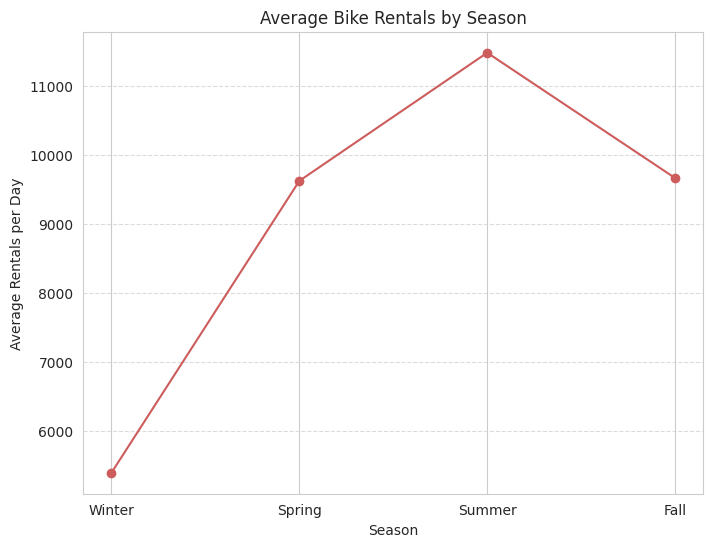

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(seasonal_avg_rentals['season'], seasonal_avg_rentals['total_rentals'], marker='o', linestyle='-', color='IndianRed')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals per Day')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### b. Weekdays vs. weekends

In [ ]:
daily_trends = processed_data.groupby(['date', 'is_weekend', 'is_holiday']).agg(
    total_rentals=('total_rentals', 'sum')
).reset_index()


In [ ]:
daily_weekend = daily_trends.groupby('is_weekend').agg(total_rentals=('total_rentals', 'mean')).reset_index()

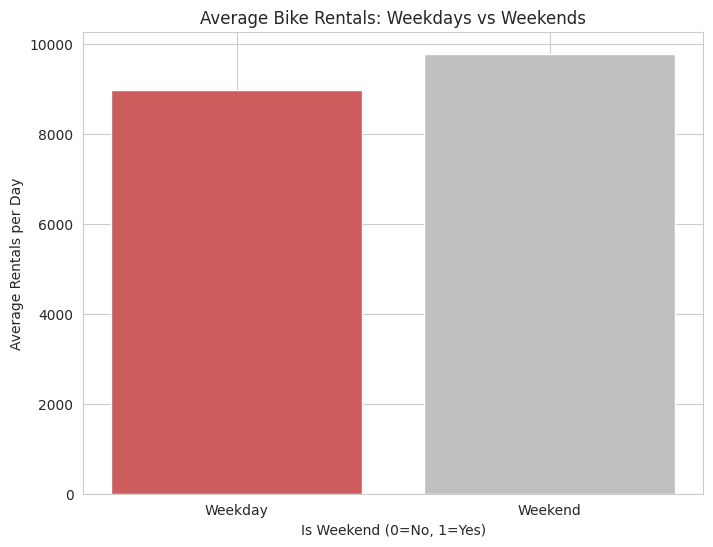

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(daily_weekend['is_weekend'], daily_weekend['total_rentals'], color=['IndianRed', 'Silver'])
plt.title('Average Bike Rentals: Weekdays vs Weekends')
plt.xlabel('Is Weekend (0=No, 1=Yes)')
plt.ylabel('Average Rentals per Day')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.show()

### c. Holidays vs. non-holidays

In [ ]:
daily_holiday = daily_trends.groupby('is_holiday').agg(total_rentals=('total_rentals', 'mean')).reset_index()

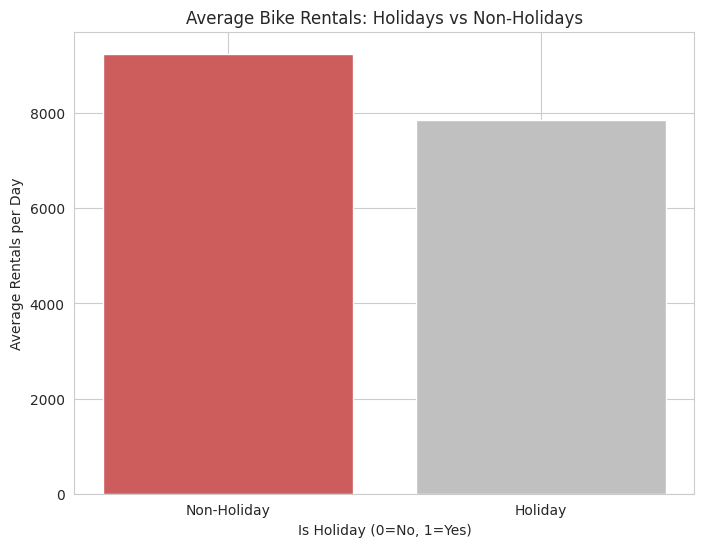

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(daily_holiday['is_holiday'], daily_holiday['total_rentals'], color=['IndianRed', 'Silver'])
plt.title('Average Bike Rentals: Holidays vs Non-Holidays')
plt.xlabel('Is Holiday (0=No, 1=Yes)')
plt.ylabel('Average Rentals per Day')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()

### d. Time of day patterns

In [ ]:
time_columns = ['morning_pickups', 'afternoon_pickups', 'night_pickups', 'midnight_pickups']

In [ ]:
day_trends = processed_data.groupby(['date'])[['morning_pickups', 'afternoon_pickups', 'night_pickups', 'midnight_pickups']].sum().reset_index()

In [ ]:
day_trends['total_rentals'] = day_trends[['morning_pickups', 'afternoon_pickups', 'night_pickups', 'midnight_pickups']].sum(axis=1)

In [ ]:
average_pickups=day_trends[['morning_pickups', 'afternoon_pickups', 'night_pickups', 'midnight_pickups']].mean()

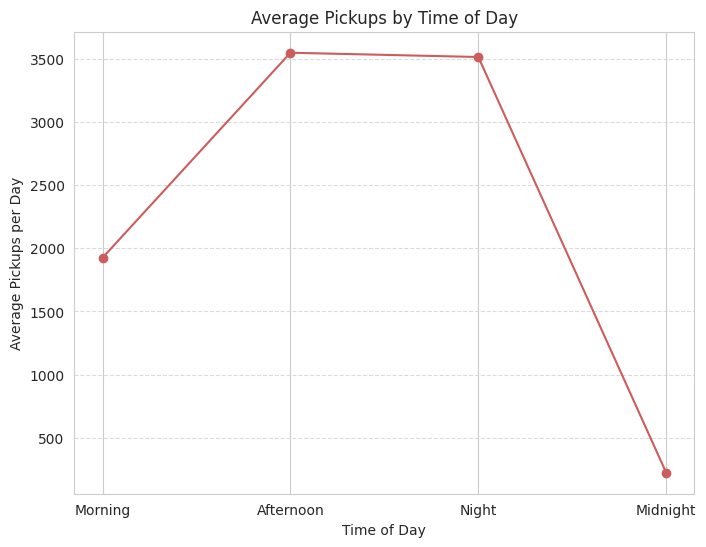

In [ ]:
plt.figure(figsize=(8, 6))
average_pickups.plot(kind='line', marker='o', color='IndianRed')
plt.title('Average Pickups by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pickups per Day')
plt.xticks(ticks=range(len(time_columns)), labels=['Morning', 'Afternoon', 'Night', 'Midnight'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Conclusion:**

We analyzed time-related factors to understand their impact on total bike pickups. Seasonal trends show that summer has the highest daily rentals (11,479), followed by autumn (9,666) and spring (9,625), with winter seeing the lowest usage (5,401) due to colder weather. Comparing weekdays and weekends, weekends have higher rentals (9,788) driven by leisure activities, while weekdays (8,979) are more influenced by commuting patterns. For holidays vs. non-holidays, non-holidays slightly outperform holidays, likely due to longer trips by car on holidays. Looking at the time of day, afternoons (3,547) and evenings (3,513) dominate rental activity, while mornings (1,926) and late nights (225) see less use, reflecting both commuting and recreational behaviors.


## ii. Weather Factors

### a. Correlations between weather variables and bike rentals

In [ ]:
weather_vars = ['temp', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility', 'total_rentals']
weather_data = processed_data[weather_vars]
correlation_matrix = weather_data.corr()

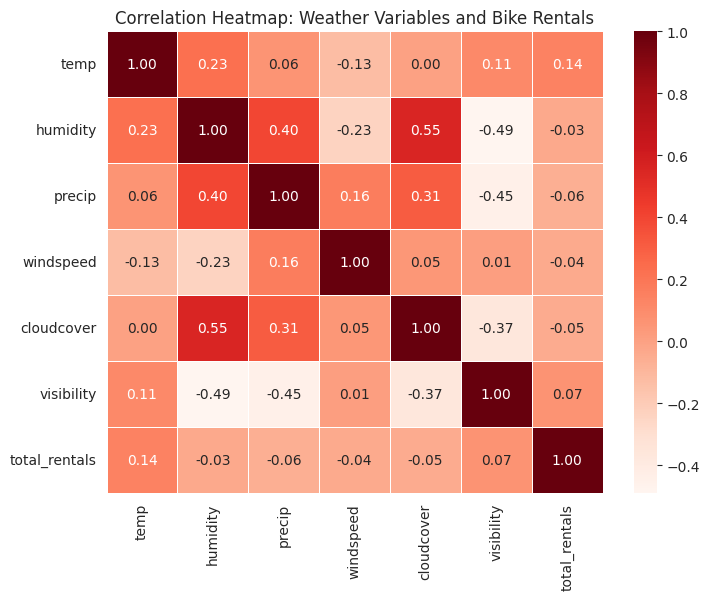

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Weather Variables and Bike Rentals')
plt.show()

### b. Rainy vs. non-rainy days

In [ ]:
rain_trends = processed_data.groupby(['date', 'precip']).agg(total_rentals=('total_rentals', 'sum')).reset_index()

In [ ]:
rainy_day = rain_trends[rain_trends['precip'] > 0]
not_rainy_day = rain_trends[rain_trends['precip'] == 0]

In [ ]:
avg_rainy_rentals = rainy_day['total_rentals'].mean()
avg_not_rainy_rentals = not_rainy_day['total_rentals'].mean()

In [ ]:
categories = ['Rainy Day', 'Not Rainy Day']
averages = [avg_rainy_rentals, avg_not_rainy_rentals]

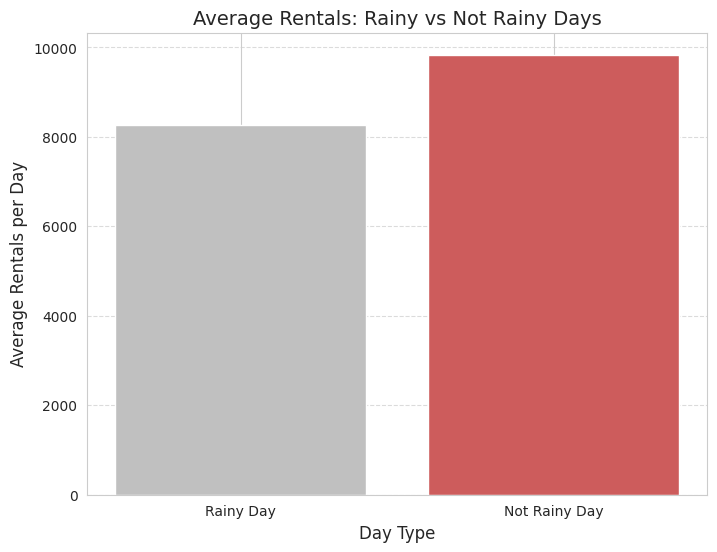

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(categories, averages, color=['Silver', 'IndianRed'])
plt.title('Average Rentals: Rainy vs Not Rainy Days', fontsize=14)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Rentals per Day', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### c. Temperature impact

In [ ]:
processed_data['temp_bin'] = pd.cut(processed_data['temp'], bins=[0, 10, 20, 30, 40], labels=['0-10°C', '10-20°C', '20-30°C', '30-40°C'])

In [ ]:
temp_trends = processed_data.groupby(['date', 'temp_bin']).agg(total_rentals=('total_rentals', 'sum')).reset_index()

/var/tmp/ipykernel_115605/3630988582.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_trends = processed_data.groupby(['date', 'temp_bin']).agg(total_rentals=('total_rentals', 'sum')).reset_index()


In [ ]:
temp_avg_rentals = temp_trends.groupby('temp_bin')['total_rentals'].mean().reset_index()

/var/tmp/ipykernel_115605/3829286080.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_avg_rentals = temp_trends.groupby('temp_bin')['total_rentals'].mean().reset_index()


In [ ]:
colors = sns.color_palette("Reds", len(temp_avg_rentals['temp_bin']))

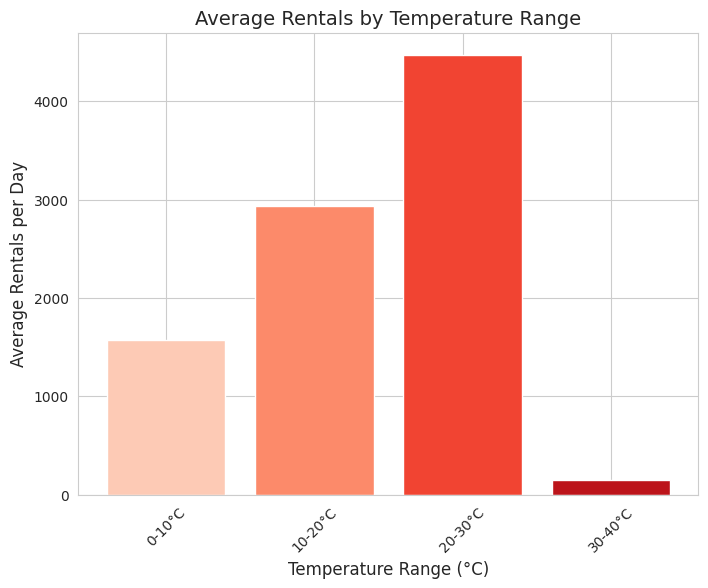

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(temp_avg_rentals['temp_bin'],
        temp_avg_rentals['total_rentals'],
        color=colors)
plt.title('Average Rentals by Temperature Range', fontsize=14)
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Average Rentals per Day', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### d. Wind speed impact

In [ ]:
processed_data['windspeed_bin'] = pd.cut(
    processed_data['windspeed'],
    bins=[0, 10, 20, 30, 40, 60],
    labels=['0-10 km/h', '10-20 km/h', '20-30 km/h', '30-40 km/h', '40-60 km/h'],
    include_lowest=True
)

In [ ]:
print(processed_data['windspeed_bin'].value_counts())

windspeed_bin
20-30 km/h    392340
10-20 km/h    312918
30-40 km/h    125832
40-60 km/h     32075
0-10 km/h       2121
Name: count, dtype: int64


In [ ]:
wind_trends = processed_data.groupby(['date', 'windspeed_bin']).agg(total_rentals=('total_rentals', 'sum')).reset_index()

/var/tmp/ipykernel_115605/3102077669.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_trends = processed_data.groupby(['date', 'windspeed_bin']).agg(total_rentals=('total_rentals', 'sum')).reset_index()


In [ ]:
wind_trends = wind_trends[wind_trends['total_rentals'] != 0]

In [ ]:
wind_avg_rentals = wind_trends.groupby('windspeed_bin')['total_rentals'].mean().reset_index()

/var/tmp/ipykernel_115605/3787450366.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_avg_rentals = wind_trends.groupby('windspeed_bin')['total_rentals'].mean().reset_index()


In [ ]:
colors = sns.color_palette("Reds", len(wind_avg_rentals['windspeed_bin']))

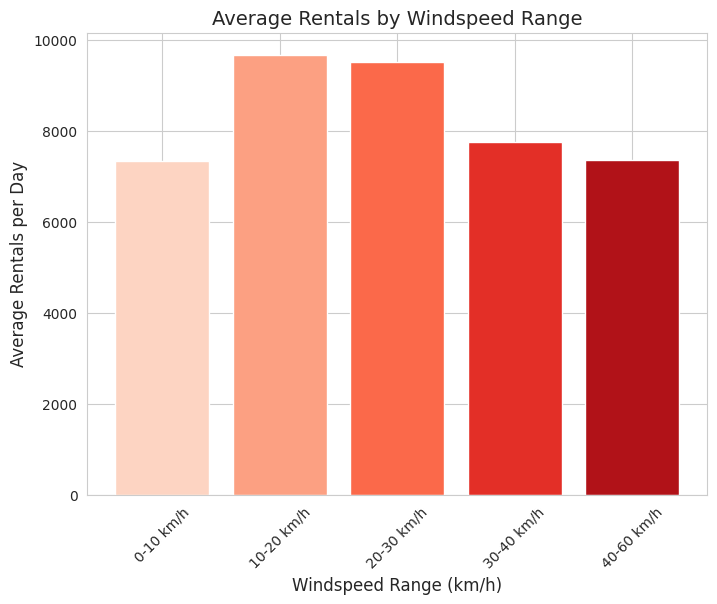

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(wind_avg_rentals['windspeed_bin'],
        wind_avg_rentals['total_rentals'],
        color=colors)
plt.title('Average Rentals by Windspeed Range', fontsize=14)
plt.xlabel('Windspeed Range (km/h)', fontsize=12)
plt.ylabel('Average Rentals per Day', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### e. Usage across different weather categories

In [ ]:
weather_trends = processed_data.groupby(['date', 'icon']).agg(total_rentals=('total_rentals', 'sum')).reset_index()

In [ ]:
weather_avg_rentals = weather_trends.groupby('icon')['total_rentals'].mean().reset_index().sort_values(by='total_rentals', ascending=False)

/var/tmp/ipykernel_115605/1834433654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_rentals', y='icon', data=weather_avg_rentals, palette='Reds_r')


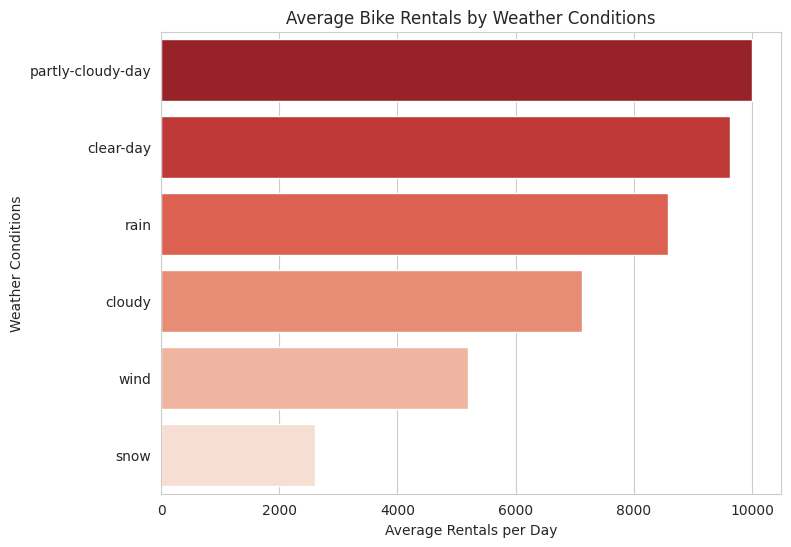

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='total_rentals', y='icon', data=weather_avg_rentals, palette='Reds_r')
plt.title('Average Bike Rentals by Weather Conditions')
plt.xlabel('Average Rentals per Day')
plt.ylabel('Weather Conditions')
plt.show()

In [ ]:
weather_days = processed_data.groupby('icon')['date'].nunique().reset_index()
weather_days.columns = ['icon', 'num_days']
print(weather_days)

                icon  num_days
0          clear-day        78
1             cloudy        37
2  partly-cloudy-day       838
3               rain       596
4               snow        33
5               wind         2


### **Conclusion:**
We analyzed weather-related factors to understand their impact on total bike pickups. Weather conditions show that visibility (0.07) and temperature (0.14) positively correlate with rentals, while humidity (-0.03), precipitation (-0.06), windspeed (-0.04), and cloud cover (-0.05) negatively impact usage. Rentals are higher on non-rainy days (9,837) compared to rainy days (8,258). Moderate temperatures, such as 20-30°C (4,473) and 10-20°C (2,939), drive the highest rentals, while extreme heat (30-40°C, 148) and cold (0-10°C, 1,569) lower activity. Rentals are also highest during gentle breezes (10-20 km/h, 9,617) and moderate breezes (20-30 km/h, 9,513), but drop with stronger winds (>30 km/h). Among weather categories, partly cloudy days (9,989) and clear days (9,620) see the most activity, while cloudy (7,115) and snowy days (2,599) are the least favorable, highlighting the strong influence of weather on biking behavior.


## iii. Spatial Factors (Station Activity)

### a. Top 10 busiest stations

In [ ]:
station_trends = processed_data.groupby(['date', 'station_name']).agg(total_rentals=('total_rentals', 'sum')).reset_index()

In [ ]:
station_avg_rentals = station_trends.groupby('station_name')['total_rentals'].mean().reset_index().sort_values(by='total_rentals', ascending=False)

In [ ]:
top_10_stations = station_avg_rentals.head(10)

/var/tmp/ipykernel_115605/2914595324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_rentals', y='station_name', data=top_10_stations, palette='Reds_r')


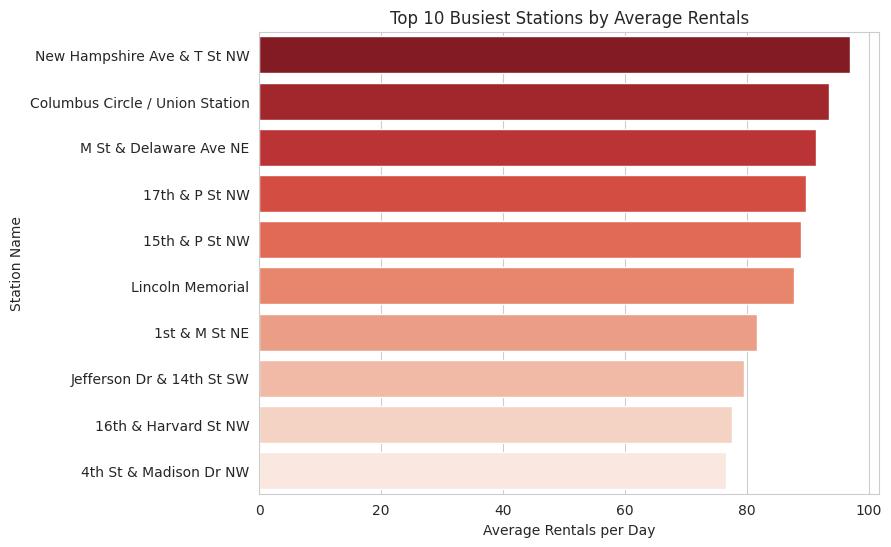

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='total_rentals', y='station_name', data=top_10_stations, palette='Reds_r')
plt.title('Top 10 Busiest Stations by Average Rentals')
plt.xlabel('Average Rentals per Day')
plt.ylabel('Station Name')
plt.show()

### b. Bottom 10 least-used stations

In [ ]:
bottom_10_stations = station_avg_rentals.tail(10)

/var/tmp/ipykernel_115605/1063900026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_rentals', y='station_name', data=bottom_10_stations, palette='Reds_r')


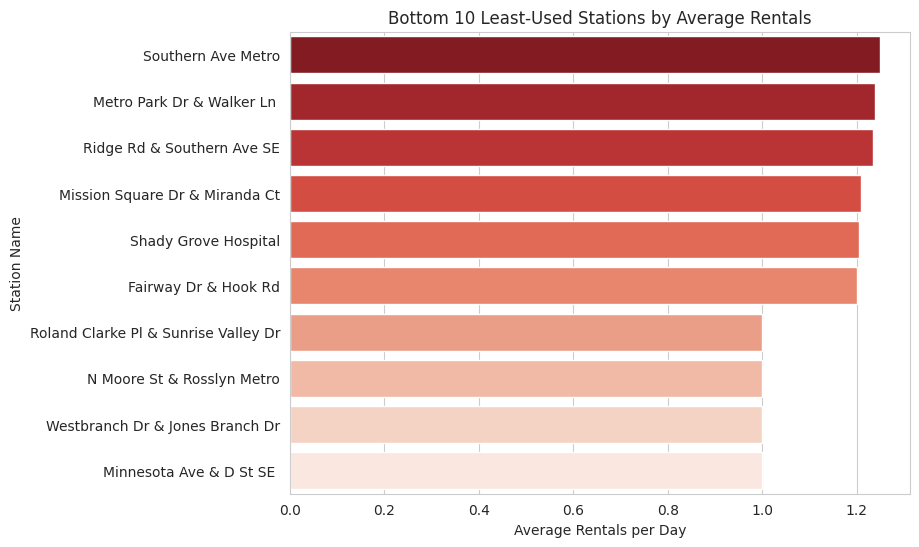

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='total_rentals', y='station_name', data=bottom_10_stations, palette='Reds_r')
plt.title('Bottom 10 Least-Used Stations by Average Rentals')
plt.xlabel('Average Rentals per Day')
plt.ylabel('Station Name')
plt.show()

### **Conclusion:**

We analyzed the distribution of bike usage across stations in DC and identified clear patterns. The busiest stations, such as New Hampshire Ave & T St NW, Columbus Circle / Union Station, and M St & Delaware Ave NE, are located in high-traffic areas, likely serving commuters and tourists. Stations near landmarks like Lincoln Memorial and Jefferson Dr & 14th St SW highlight the impact of tourism on rental demand. Conversely, the least-used stations, like Southern Ave Metro and Metro Park Dr & Walker Ln, are situated in less dense or poorly connected areas, indicating potential opportunities for improvement. These insights emphasize the importance of maintaining supply at high-demand stations while optimizing or promoting usage at underperforming ones.

## iv. Imbalance

### Sampling the data

In [ ]:
daily_rent_detail_df_sampled = daily_rent_detail_df.sample(frac=0.1, random_state=42)

### a. Station Imbalance

#### Pickupcount

In [ ]:
def categorize_time(hour):
    if 5 <= hour < 11:
        return 'morning'
    elif 11 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 24:
        return 'night'
    else:
        return 'midnight'

In [ ]:
daily_rent_detail_df_sampled['started_at'] = pd.to_datetime(daily_rent_detail_df_sampled['started_at'], errors='coerce')

In [ ]:
daily_rent_detail_df_sampled['pickup_period'] = daily_rent_detail_df_sampled['started_at'].dt.hour.apply(categorize_time)

In [ ]:
print(daily_rent_detail_df_sampled[['started_at', 'pickup_period']])

                  started_at pickup_period
7467221  2022-11-07 20:38:54         night
15652282 2024-08-15 08:09:11       morning
15503272 2024-07-13 15:20:17     afternoon
7871699  2023-01-26 14:20:33     afternoon
6434732  2022-08-27 09:35:23       morning
...                      ...           ...
3689540  2021-10-21 20:08:04         night
14763087 2024-06-26 07:19:55       morning
11293201 2023-10-15 13:10:22     afternoon
14808053 2024-06-01 09:50:53       morning
9472623  2023-06-13 15:17:11     afternoon

[1458711 rows x 2 columns]


In [ ]:
daily_rent_detail_df_sampled['started_date'] = daily_rent_detail_df_sampled['started_at'].dt.date

In [ ]:
started_keep = ['start_station_name',  "started_date", "pickup_period"]

In [ ]:
daily_rent_detail_df_started = daily_rent_detail_df_sampled[started_keep]

In [ ]:
daily_rent_detail_df_started_ = daily_rent_detail_df_started.drop(columns=['pickup_period'])

In [ ]:
daily_rent_detail_df_started_.head()

,start_station_name,started_date
7467221,Fort Totten Metro,2022-11-07
15652282,14th St & Rhode Island Ave NW,2024-08-15
15503272,Thomas Circle,2024-07-13
7871699,19th & G St NW,2023-01-26
6434732,1st & O St NW,2022-08-27


#### Dropoffcount

In [ ]:
def categorize_time(hour):
    if 5 <= hour < 11:
        return 'morning'
    elif 11 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 24:
        return 'night'
    else:
        return 'midnight'

In [ ]:
daily_rent_detail_df_sampled['ended_at'] = pd.to_datetime(daily_rent_detail_df_sampled['ended_at'], errors='coerce')

In [ ]:
daily_rent_detail_df_sampled['dropoff_period'] = daily_rent_detail_df_sampled['ended_at'].dt.hour.apply(categorize_time)

In [ ]:
print(daily_rent_detail_df_sampled[['ended_at', 'dropoff_period']])

                    ended_at dropoff_period
7467221  2022-11-07 20:48:08          night
15652282 2024-08-15 08:13:29        morning
15503272 2024-07-13 15:26:35      afternoon
7871699  2023-01-26 15:02:00      afternoon
6434732  2022-08-27 10:04:09        morning
...                      ...            ...
3689540  2021-10-21 20:12:27          night
14763087 2024-06-26 07:22:42        morning
11293201 2023-10-15 13:31:06      afternoon
14808053 2024-06-01 10:03:20        morning
9472623  2023-06-13 15:33:22      afternoon

[1458711 rows x 2 columns]


In [ ]:
daily_rent_detail_df_sampled['ended_date'] = daily_rent_detail_df_sampled['ended_at'].dt.date

In [ ]:
ended_keep = ['end_station_name', "ended_date", "dropoff_period"]

In [ ]:
daily_rent_detail_df_ended = daily_rent_detail_df_sampled[ended_keep]

In [ ]:
daily_rent_detail_df_ended_ = daily_rent_detail_df_ended.drop(columns=['dropoff_period'])

In [ ]:
daily_rent_detail_df_ended_.head()

,end_station_name,ended_date
7467221,5th & Kennedy St NW,2022-11-07
15652282,15th St & New York Ave NW,2024-08-15
15503272,25th St & Pennsylvania Ave NW,2024-07-13
7871699,19th St & Pennsylvania Ave NW,2023-01-26
6434732,Jefferson Dr & 14th St SW,2022-08-27


### b. Daily imbalance by station

#### daily pickupcount by station

In [ ]:
grouped_counts = daily_rent_detail_df_started_.groupby(
    ['start_station_name', 'started_date']
).size().reset_index(name='count_start')

In [ ]:
daily_rent_detail_df_started_ = daily_rent_detail_df_started_.merge(
    grouped_counts, on=['start_station_name', 'started_date'], how='left'
)

In [ ]:
print(daily_rent_detail_df_started_.head())

              start_station_name started_date  count_start
0              Fort Totten Metro   2022-11-07            3
1  14th St & Rhode Island Ave NW   2024-08-15            8
2                  Thomas Circle   2024-07-13            9
3                 19th & G St NW   2023-01-26            5
4                  1st & O St NW   2022-08-27            5


#### daily dropoffcount by station

In [ ]:
grouped_counts_ = daily_rent_detail_df_ended_.groupby(
    ['end_station_name', 'ended_date']
).size().reset_index(name='count_end')

In [ ]:
daily_rent_detail_df_ended_ = daily_rent_detail_df_ended_.merge(
    grouped_counts_, on=['end_station_name', 'ended_date'], how='left'
)

In [ ]:
print(daily_rent_detail_df_ended_.head())

                end_station_name  ended_date  count_end
0            5th & Kennedy St NW  2022-11-07          1
1      15th St & New York Ave NW  2024-08-15          4
2  25th St & Pennsylvania Ave NW  2024-07-13          9
3  19th St & Pennsylvania Ave NW  2023-01-26          3
4      Jefferson Dr & 14th St SW  2022-08-27         16


In [ ]:
# Calculate the daily imbalance by each station
daily_imbalance = pd.merge(
    daily_rent_detail_df_started_,
    daily_rent_detail_df_ended_,
    left_on=['started_date', 'start_station_name'],
    right_on=['ended_date', 'end_station_name'],
    how='inner',
    suffixes=('_start', '_end')
).assign(
    station_name=lambda df: df['start_station_name'],
    date=lambda df: df['started_date']
)[['station_name', 'date', 'count_start', 'count_end']]

In [ ]:
daily_imbalance = daily_imbalance.drop_duplicates()

In [ ]:
daily_imbalance['daily_imbalance'] = daily_imbalance['count_start'] - daily_imbalance['count_end']

In [ ]:
daily_imbalance

,station_name,date,count_start,count_end,daily_imbalance
0,Fort Totten Metro,2022-11-07,3,3,0
3,14th St & Rhode Island Ave NW,2024-08-15,8,9,-1
12,Thomas Circle,2024-07-13,9,5,4
17,19th & G St NW,2023-01-26,5,3,2
20,1st & O St NW,2022-08-27,5,2,3
...,...,...,...,...,...
6716917,Clarendon Blvd & N Fillmore St,2020-06-21,1,1,0
6717001,Clarendon Blvd & N Fillmore St,2023-07-02,1,1,0
6717023,Eads St & 15th St S,2024-02-21,1,1,0
6717087,Tenleytown / Wisconsin Ave & Albemarle St NW,2021-10-30,1,1,0


In [ ]:
average_imbalance = daily_imbalance.groupby(['station_name'])['daily_imbalance'].mean().reset_index()

In [ ]:
average_imbalance = average_imbalance.sort_values(by='daily_imbalance', ascending=False)

In [ ]:
average_imbalance

,station_name,daily_imbalance
93,17th & P St NW,3.698444
83,16th & Harvard St NW,3.027004
41,13th St & New York Ave NW,2.591326
19,11th & Kenyon St NW,1.691051
661,Park Rd & Holmead Pl NW,1.673861
...,...,...
55,14th & Quincy St NW,-2.020000
572,Massachusetts Ave & Dupont Circle NW,-2.215040
227,7th & K St NE,-2.481481
63,14th St & New York Ave NW,-2.484733


### c. Period imbalance by station

#### Pickup Count By station and period

In [ ]:
daily_rent_detail_df_started_period = daily_rent_detail_df_started.drop(columns = ['started_date'])

In [ ]:
daily_rent_detail_df_started_period

,start_station_name,pickup_period
7467221,Fort Totten Metro,night
15652282,14th St & Rhode Island Ave NW,morning
15503272,Thomas Circle,afternoon
7871699,19th & G St NW,afternoon
6434732,1st & O St NW,morning
...,...,...
3689540,Wilson Blvd & N Franklin Rd,night
14763087,7th St & Massachusetts Ave NE,morning
11293201,Main Line Blvd & E Glebe,afternoon
14808053,Fairfax Dr & N Taylor St,morning


In [ ]:
grouped_counts = daily_rent_detail_df_started_period.groupby(
    ['start_station_name', 'pickup_period']
).size().reset_index(name='count_start')

In [ ]:
daily_rent_detail_df_started_period = daily_rent_detail_df_started_period.merge(
    grouped_counts, on=['start_station_name', 'pickup_period'], how='left'
)

In [ ]:
daily_rent_detail_df_started_period

,start_station_name,pickup_period,count_start
0,Fort Totten Metro,night,840
1,14th St & Rhode Island Ave NW,morning,794
2,Thomas Circle,afternoon,2670
3,19th & G St NW,afternoon,1169
4,1st & O St NW,morning,1250
...,...,...,...
1458706,Wilson Blvd & N Franklin Rd,night,383
1458707,7th St & Massachusetts Ave NE,morning,953
1458708,Main Line Blvd & E Glebe,afternoon,428
1458709,Fairfax Dr & N Taylor St,morning,219


In [ ]:
daily_rent_detail_df_started_period_ = daily_rent_detail_df_started_period.groupby(['start_station_name', 'pickup_period']).sum().reset_index()

In [ ]:
daily_rent_detail_df_started_period_

,start_station_name,pickup_period,count_start
0,S Scott St & 13th St S,afternoon,64
1,S Scott St & 13th St S,midnight,1
2,S Scott St & 13th St S,morning,144
3,S Scott St & 13th St S,night,324
4,10th & E St NW,afternoon,3663396
...,...,...,...
3446,Woody Ward Rec Center,night,16
3447,Yuma St & Tenley Circle NW,afternoon,38416
3448,Yuma St & Tenley Circle NW,midnight,81
3449,Yuma St & Tenley Circle NW,morning,6241


#### Dropoff Count By station and period

In [ ]:
daily_rent_detail_df_ended_period = daily_rent_detail_df_ended.drop(columns = ['ended_date'])

In [ ]:
daily_rent_detail_df_ended_period

,end_station_name,dropoff_period
7467221,5th & Kennedy St NW,night
15652282,15th St & New York Ave NW,morning
15503272,25th St & Pennsylvania Ave NW,afternoon
7871699,19th St & Pennsylvania Ave NW,afternoon
6434732,Jefferson Dr & 14th St SW,morning
...,...,...
3689540,Langston Blvd & N Cleveland St,night
14763087,Eastern Market Metro / Pennsylvania Ave & 8th ...,morning
11293201,Eads St & 15th St S,afternoon
14808053,Court House Metro / 15th St & N Uhle St,morning


In [ ]:
grouped_counts = daily_rent_detail_df_ended_period.groupby(
    ['end_station_name', 'dropoff_period']
).size().reset_index(name='count_end')

In [ ]:
daily_rent_detail_df_ended_period = daily_rent_detail_df_ended_period.merge(
    grouped_counts, on=['end_station_name', 'dropoff_period'], how='left'
)

In [ ]:
daily_rent_detail_df_ended_period

,end_station_name,dropoff_period,count_end
0,5th & Kennedy St NW,night,499
1,15th St & New York Ave NW,morning,510
2,25th St & Pennsylvania Ave NW,afternoon,2627
3,19th St & Pennsylvania Ave NW,afternoon,668
4,Jefferson Dr & 14th St SW,morning,1719
...,...,...,...
1458706,Langston Blvd & N Cleveland St,night,285
1458707,Eastern Market Metro / Pennsylvania Ave & 8th ...,morning,2400
1458708,Eads St & 15th St S,afternoon,471
1458709,Court House Metro / 15th St & N Uhle St,morning,539


In [ ]:
daily_rent_detail_df_ended_period_ = daily_rent_detail_df_ended_period.groupby(['end_station_name', 'dropoff_period']).sum().reset_index()

In [ ]:
daily_rent_detail_df_ended_period_

,end_station_name,dropoff_period,count_end
0,S Scott St & 13th St S,afternoon,4
1,S Scott St & 13th St S,midnight,4
2,S Scott St & 13th St S,morning,9
3,S Scott St & 13th St S,night,676
4,10th & E St NW,afternoon,3115225
...,...,...,...
3478,Yuma St & Tenley Circle NW,afternoon,4356
3479,Yuma St & Tenley Circle NW,midnight,16
3480,Yuma St & Tenley Circle NW,morning,2601
3481,Yuma St & Tenley Circle NW,night,6889


In [ ]:
period_imbalance = pd.merge(
    daily_rent_detail_df_started_period_,
    daily_rent_detail_df_ended_period_,
    left_on=['start_station_name', 'pickup_period'],
    right_on=['end_station_name', 'dropoff_period'],
    how='inner',
    suffixes=('_start', '_end')
).assign(
    station_name=lambda df: df['start_station_name'],
    period=lambda df: df['pickup_period']
)[['station_name', 'period', 'count_start', 'count_end']] # 使用 inner 只保留匹配到的行，若要保留所有行，可用 'outer'


In [ ]:
period_imbalance = period_imbalance.drop_duplicates()

In [ ]:
period_imbalance['period_imbalance'] = period_imbalance['count_start'] - period_imbalance['count_end']

In [ ]:
period_imbalance

,station_name,period,count_start,count_end,period_imbalance
0,S Scott St & 13th St S,afternoon,64,4,60
1,S Scott St & 13th St S,midnight,1,4,-3
2,S Scott St & 13th St S,morning,144,9,135
3,S Scott St & 13th St S,night,324,676,-352
4,10th & E St NW,afternoon,3663396,3115225,548171
...,...,...,...,...,...
3395,Woody Ward Rec Center,night,16,81,-65
3396,Yuma St & Tenley Circle NW,afternoon,38416,4356,34060
3397,Yuma St & Tenley Circle NW,midnight,81,16,65
3398,Yuma St & Tenley Circle NW,morning,6241,2601,3640


In [ ]:
daily_imbalance['date'].nunique()

1584

In [ ]:
period_imbalance['average_period_imbalance'] = period_imbalance['period_imbalance']/1584

In [ ]:
period_imbalance = period_imbalance.sort_values(by='average_period_imbalance', ascending=False)

In [ ]:
period_imbalance

,station_name,period,count_start,count_end,period_imbalance,average_period_imbalance
1323,Columbus Circle / Union Station,night,34000561,15824484,18176077,11474.796086
372,17th & P St NW,night,19891600,8696601,11194999,7067.549874
2416,New Hampshire Ave & T St NW,morning,16080100,5428900,10651200,6724.242424
830,4th St & Madison Dr NW,afternoon,56400100,46144849,10255251,6474.274621
162,13th St & New York Ave NW,afternoon,10439361,1640961,8798400,5554.545455
...,...,...,...,...,...,...
2203,Massachusetts Ave & Dupont Circle NW,afternoon,19070689,29669809,-10599120,-6691.363636
813,4th & M St SW,night,8702500,19501056,-10798556,-6817.270202
1322,Columbus Circle / Union Station,morning,14326225,25704900,-11378675,-7183.506944
298,15th & P St NW,afternoon,22250089,37736449,-15486360,-9776.742424


/var/tmp/ipykernel_115605/3283751627.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10,
/var/tmp/ipykernel_115605/3283751627.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10,
/var/tmp/ipykernel_115605/3283751627.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10,
/var/tmp/ipykernel_115605/3283751627.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(

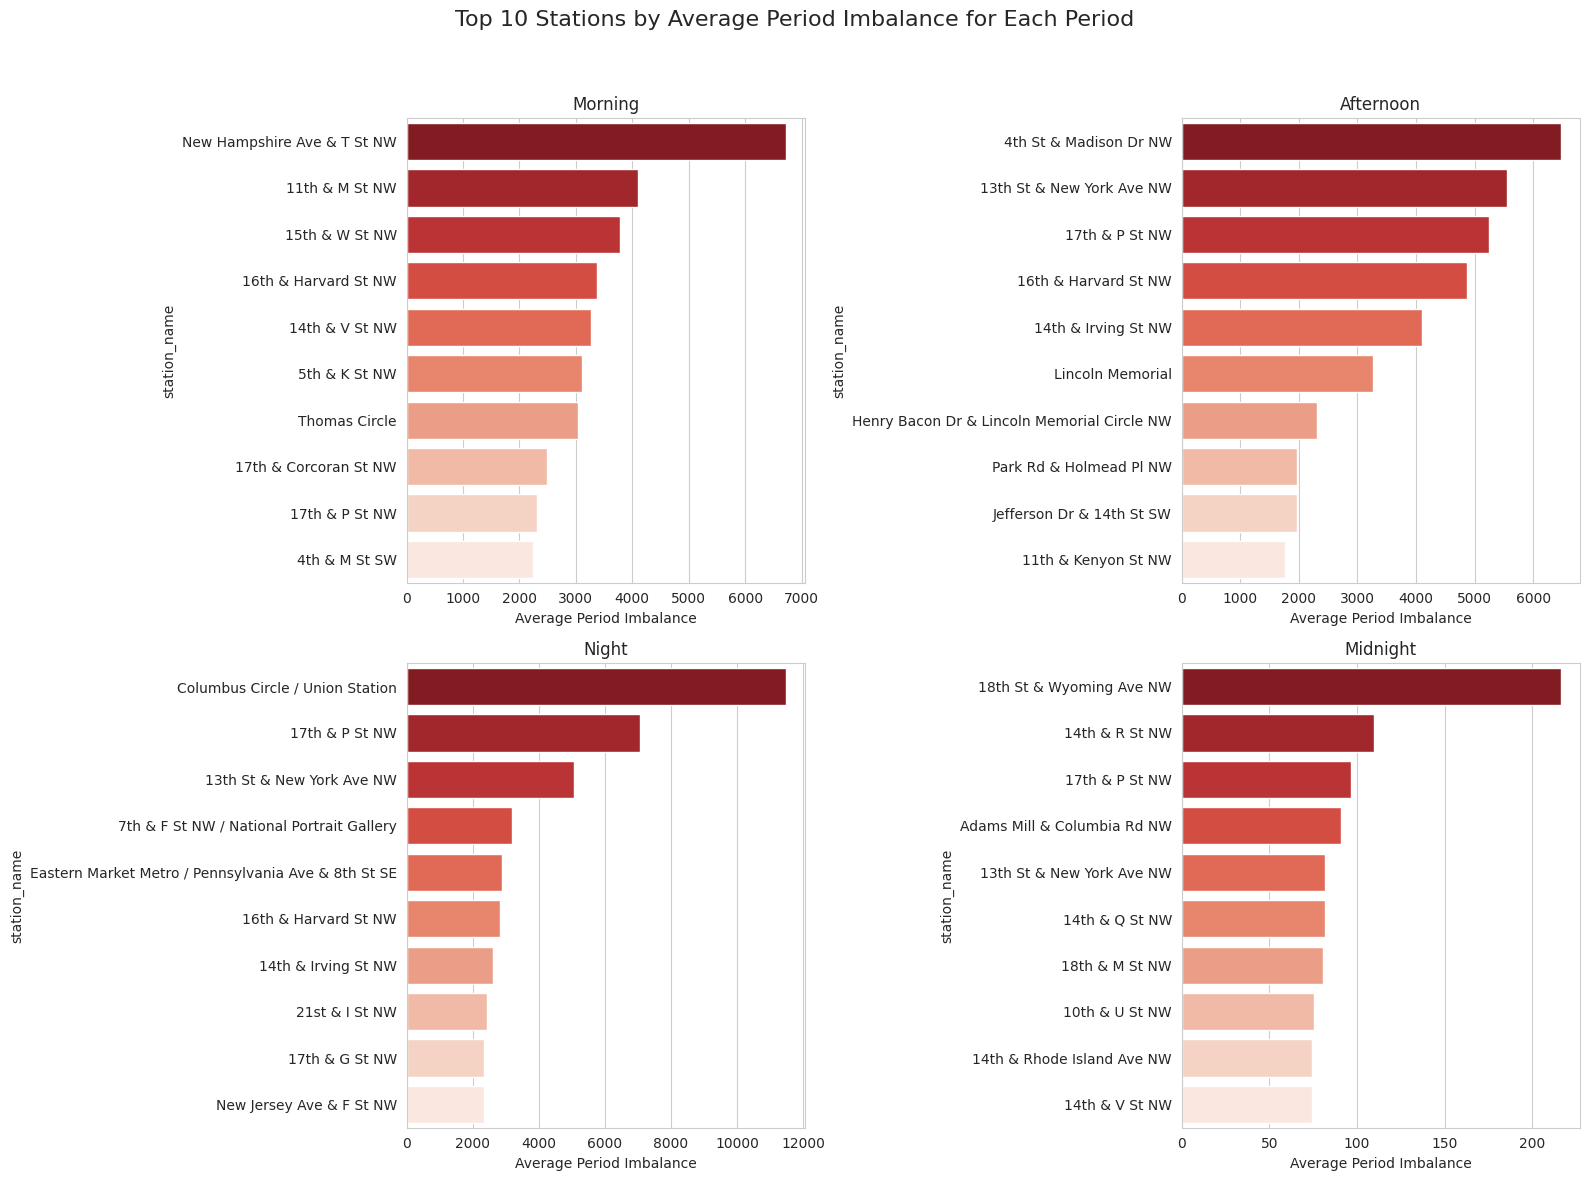

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

periods = ["morning", "afternoon", "night", "midnight"]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, period in enumerate(periods):
    ax = axes[i]
    subset = period_imbalance[period_imbalance['period'] == period]

    top10 = subset.sort_values('average_period_imbalance', ascending=False).head(10)

    sns.barplot(data=top10,
                x='average_period_imbalance',
                y='station_name',
                palette='Reds_r',
                orient='h',
                ax=ax)

    ax.set_title(period.capitalize())

    ax.set_xlabel("Average Period Imbalance")

plt.suptitle("Top 10 Stations by Average Period Imbalance for Each Period", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/tmp/ipykernel_5135/697721171.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low10,
/var/tmp/ipykernel_5135/697721171.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low10,
/var/tmp/ipykernel_5135/697721171.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low10,
/var/tmp/ipykernel_5135/697721171.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low10,


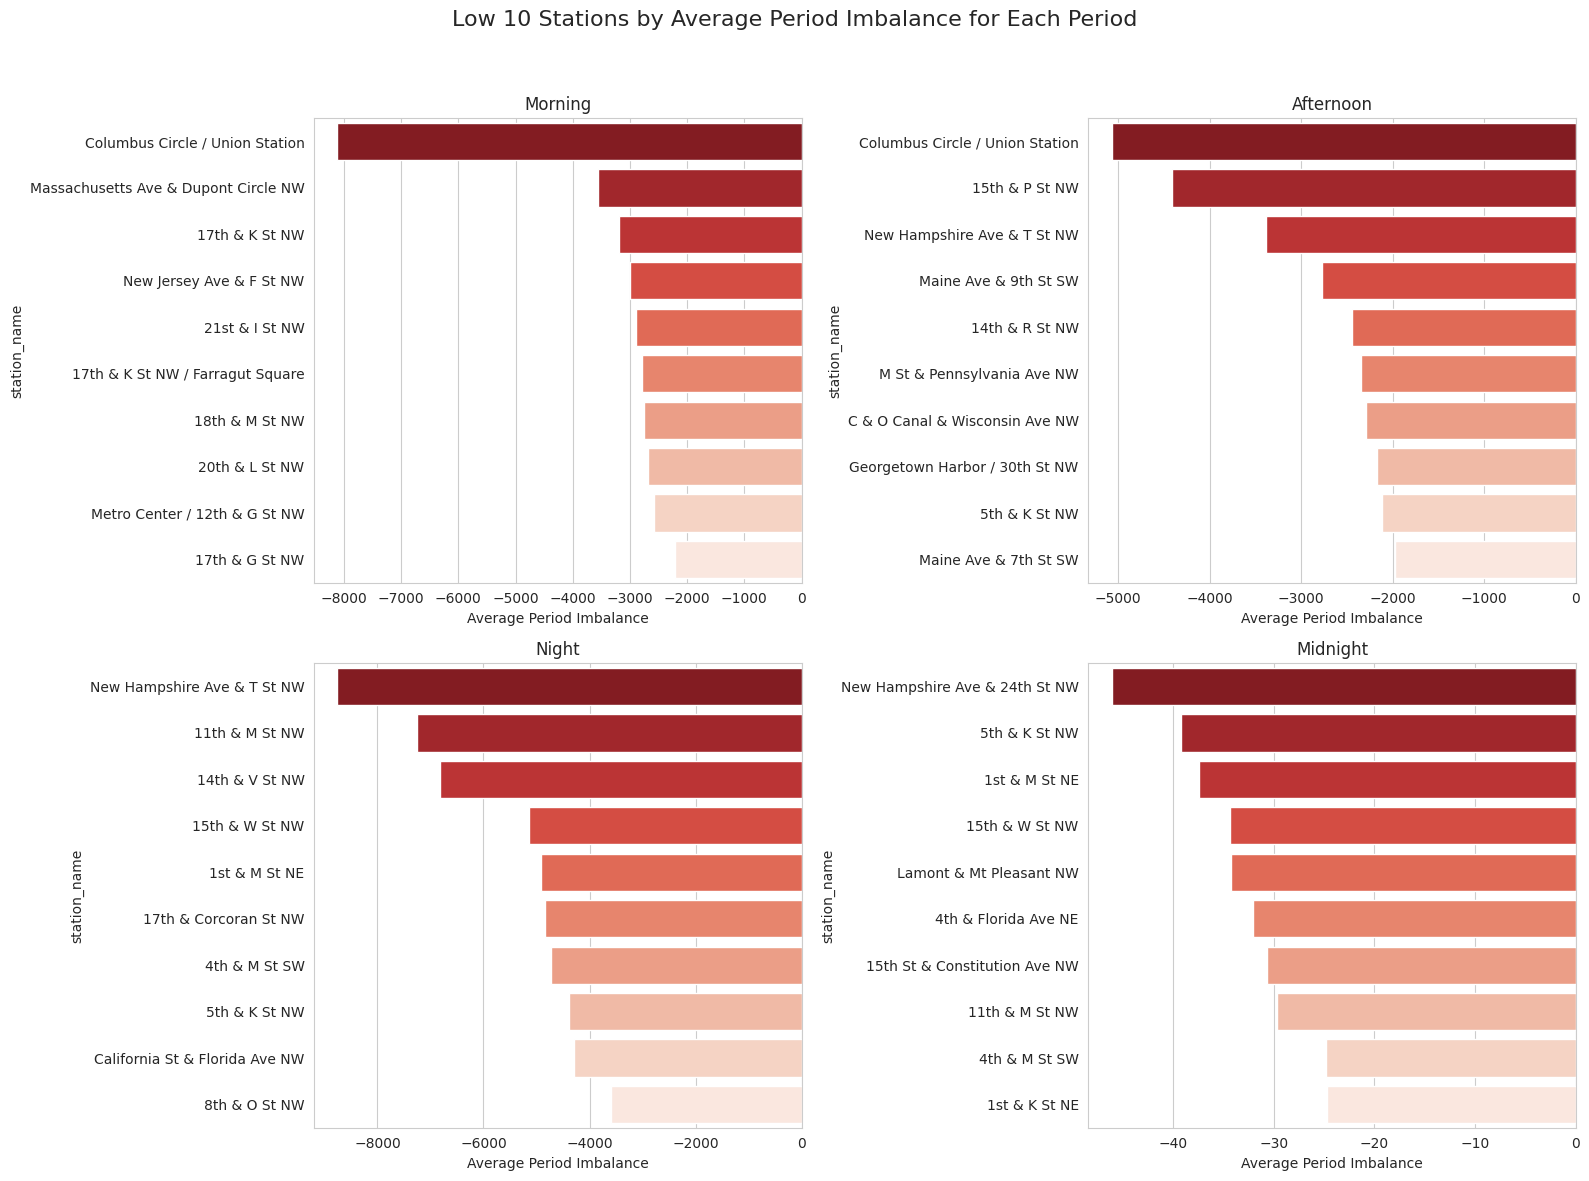

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

periods = ["morning", "afternoon", "night", "midnight"]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, period in enumerate(periods):
    ax = axes[i]
    subset = period_imbalance[period_imbalance['period'] == period]

    low10 = subset.sort_values('average_period_imbalance', ascending=True).head(10)

    sns.barplot(data=low10,
                x='average_period_imbalance',
                y='station_name',
                palette='Reds_r',
                orient='h',
                ax=ax)

    ax.set_title(period.capitalize())

    ax.set_xlabel("Average Period Imbalance")

plt.suptitle("Low 10 Stations by Average Period Imbalance for Each Period", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig("low 10_stations_by_period_imbalance.png", dpi=300, bbox_inches='tight')
plt.show()

### **Conclusion:**

The analysis of pick-up and drop-off imbalances reveals distinct patterns throughout the day. The highest imbalance occurs during the night (17:00-24:00), followed by the morning, then the afternoon, and lastly the midnight period. This trend highlights the evening hours as the most critical for addressing imbalance issues, likely driven by commuters returning home or social activities. Morning imbalances suggest high pick-up demand at residential stations, while afternoon imbalances often occur at tourist-heavy locations where bikes are returned. Midnight, with the lowest imbalance, reflects limited overall activity during late-night hours. Addressing these imbalances through time-specific bike allocations can significantly enhance service efficiency and user satisfaction

# **6. Feature selection**

## i. SelectKBest + GridSearchCV

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('final_df.csv')

X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

categorical_cols = ['season', 'icon']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

pipe = Pipeline([
    ('prep', preprocessor),
    ('select', SelectKBest(score_func=f_regression)),
    ('model', RandomForestRegressor(random_state=42))
])

Selected features: ['num__temp', 'num__humidity', 'num__precip', 'num__precipprob', 'num__snow', 'num__windgust', 'num__windspeed', 'num__cloudcover', 'num__visibility', 'num__severerisk', 'cat__season_1', 'cat__season_3', 'cat__icon_partly-cloudy-day', 'cat__icon_snow']


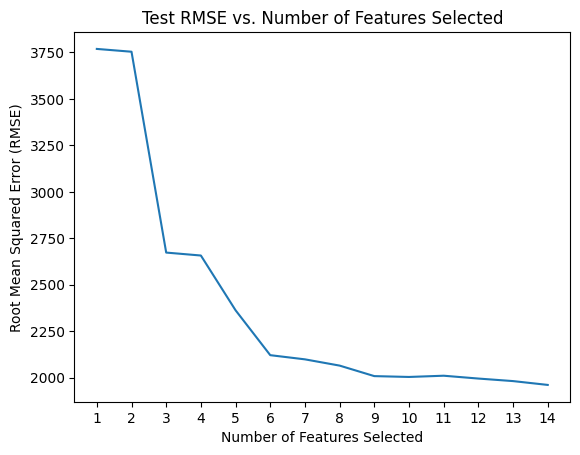

In [ ]:
# gridsearch
param_grid = {
    'select__k': range(1, X_train.shape[1] + 1)
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

selected_features_mask = best_model.named_steps['select'].get_support()
preprocessed_feature_names = best_model.named_steps['prep'].get_feature_names_out()
selected_features = [preprocessed_feature_names[i] for i in range(len(preprocessed_feature_names)) if selected_features_mask[i]]

print(f"Selected features: {selected_features}")

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Plot the number of features versus RMSE
cv_res = pd.DataFrame(grid_search.cv_results_)
plt.plot(cv_res['param_select__k'], -cv_res['mean_test_score'])
plt.xlabel("Number of Features Selected")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Test RMSE vs. Number of Features Selected")
plt.xticks(np.arange(1, len(cv_res['param_select__k']) + 1, step=1))
plt.show()

## ii. Recursive Feature Elimination(RFE)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))
])


In [ ]:
X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfecv = RFECV(
    estimator=LinearRegression(),
    scoring='neg_root_mean_squared_error',
    cv=5,
    min_features_to_select=1
)

rfecv_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('select', rfecv)
])

rfecv_pipe.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb7b58ab400>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb7b58ab6d0>)])),
                ('select',
                 RFECV(cv=5, estimator=LinearRegression(),
                       scoring='neg_root_mean_squared_error'))])

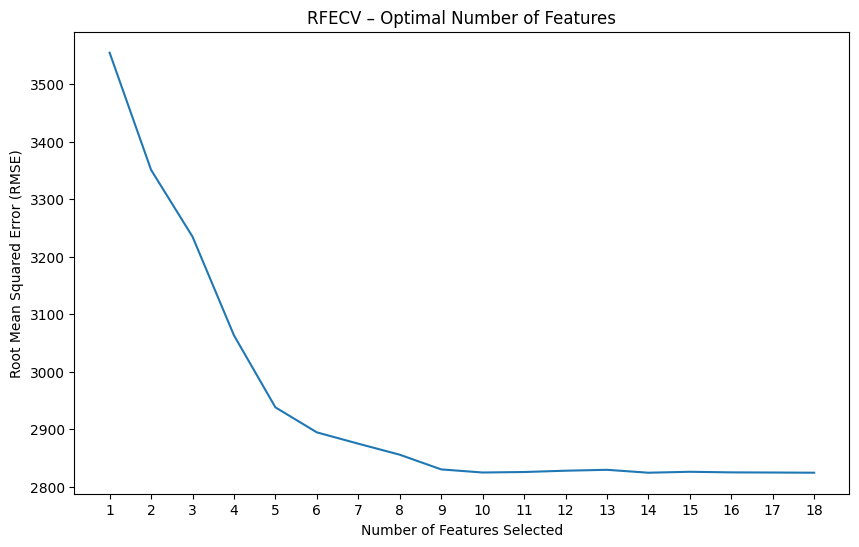

Optimal number of features: 14
Selected features: ['num__is_weekend', 'num__season', 'num__temp', 'num__humidity', 'num__precip', 'num__precipprob', 'num__windgust', 'num__windspeed', 'num__cloudcover', 'num__severerisk', 'cat__icon_cloudy', 'cat__icon_partly-cloudy-day', 'cat__icon_snow', 'cat__icon_wind']
RMSE at optimal number of features: 2824.11


In [ ]:
plt.figure(figsize=(10, 6))
plt.title("RFECV – Optimal Number of Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), -rfecv.cv_results_['mean_test_score'])
plt.xticks(range(1, len(rfecv.cv_results_['mean_test_score']) + 1))
plt.show()

optimal_num_features = rfecv.n_features_
print(f"Optimal number of features: {optimal_num_features}")

selected_features_mask = rfecv.support_
feature_names = rfecv_pipe.named_steps['prep'].get_feature_names_out()
selected_features = [feature_names[i] for i in range(len(feature_names)) if selected_features_mask[i]]
print(f"Selected features: {selected_features}")

optimal_rmse = -rfecv.cv_results_['mean_test_score'][optimal_num_features - 1]
print(f"RMSE at optimal number of features: {optimal_rmse:.2f}")

## iii. Sequential Feature Selection: Forward and Backward

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

sfs = SequentialFeatureSelector(LinearRegression(), k_features="best", scoring='neg_root_mean_squared_error')

preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', sfs),
])

preprocess_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['is_holiday', 'is_weekend',
                                                   'temp', 'humidity', 'precip',
                                                   'precipprob', 'snow',
                                                   'windgust', 'windspeed',
                                                   'cloudcover', 'visibility',
                                                   'severerisk']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['season', 'icon'])])),
                ('select',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           k_features='best',
                                           scoring='neg_root_mean_squared_error'))])

In [ ]:
data = pd.read_csv('final_df.csv')

X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

categorical_cols = ['season', 'icon']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature combination (1, 2, 3, 4, 7, 8, 11, 12, 14, 18, 21) gave best RMSE of 2780.07.



,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[-3298.9810083123307, -3585.851815660727, -337...",-3396.231349,"(2,)",126.681658,98.562634,49.281317
2,"(2, 4)","[-3061.555036006534, -3257.650909973642, -3208...",-3161.0098,"(2, 4)",86.168636,67.042126,33.521063
3,"(2, 4, 11)","[-2936.5035059256147, -3054.470936114364, -309...",-3037.58591,"(2, 4, 11)",68.703052,53.453309,26.726654
4,"(2, 3, 4, 11)","[-2878.1059859411253, -3005.3762547064953, -30...",-2957.730143,"(2, 3, 4, 11)",66.722771,51.912582,25.956291
5,"(2, 3, 4, 7, 11)","[-2844.565981704889, -2863.356756898377, -2949...",-2880.669736,"(2, 3, 4, 7, 11)",46.179173,35.928965,17.964483
6,"(2, 3, 4, 7, 11, 12)","[-2813.5690635210503, -2824.78958228598, -2891...",-2836.601528,"(2, 3, 4, 7, 11, 12)",40.866732,31.795706,15.897853
7,"(1, 2, 3, 4, 7, 11, 12)","[-2807.2671354023432, -2779.3927154950625, -28...",-2810.36229,"(1, 2, 3, 4, 7, 11, 12)",46.36067,36.070176,18.035088
8,"(1, 2, 3, 4, 7, 11, 12, 14)","[-2758.804034864423, -2747.9676081768075, -284...",-2784.80503,"(1, 2, 3, 4, 7, 11, 12, 14)",44.057716,34.2784,17.1392
9,"(1, 2, 3, 4, 7, 8, 11, 12, 14)","[-2752.616404606177, -2738.519291821036, -2849...",-2781.40293,"(1, 2, 3, 4, 7, 8, 11, 12, 14)",49.564777,38.56308,19.28154
10,"(1, 2, 3, 4, 7, 8, 11, 12, 14, 18)","[-2761.785404165576, -2728.4793286415083, -285...",-2780.11706,"(1, 2, 3, 4, 7, 8, 11, 12, 14, 18)",56.318303,43.817553,21.908776


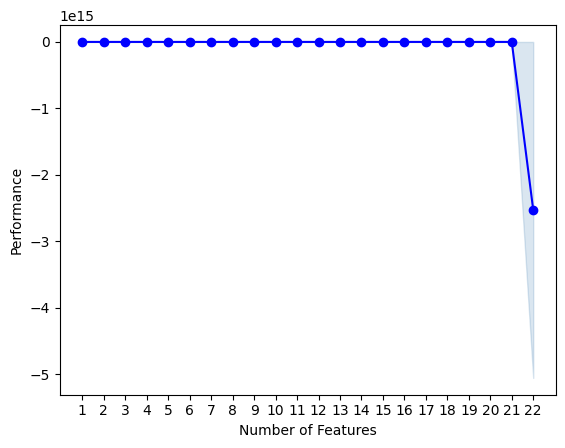

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import pandas as pd

processed_X = preprocess_pipeline.fit_transform(X_train, y_train)

print(f'feature combination {sfs.k_feature_idx_} gave best RMSE of {-sfs.k_score_:.2f}.\n')
display(pd.DataFrame.from_dict(sfs.get_metric_dict()).T)
plot_sfs(sfs.get_metric_dict(), kind='std_err');


feature combination (1, 2, 3, 4, 7, 8, 9, 11, 12, 14, 16, 18, 19) gave best RMSE of 2779.



,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-2781.5053209900598, -2708.0177060227516, -28...",-2528369199877569.0,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",6499379938980439.0,5056738399749566.0,2528369199874783.0
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[-2777.215753986981, -2709.744917524397, -2854...",-2784.369456,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...",59.237752,46.088983,23.044492
20,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[-2763.416858568125, -2716.659079945559, -2861...",-2782.557453,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...",60.035117,46.709361,23.35468
19,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[-2763.416858568125, -2716.65907994556, -2861....",-2781.918331,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...",60.052232,46.722677,23.361338
18,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[-2764.8746724578486, -2714.0746356182053, -28...",-2781.805618,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...",61.312423,47.703148,23.851574
17,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16...","[-2764.874672457849, -2714.0746356182044, -286...",-2781.805618,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16...",61.312423,47.703148,23.851574
16,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16, 18...","[-2769.976214586047, -2718.615748313589, -2865...",-2780.568216,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16, 18...",61.136288,47.566109,23.783054
15,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16, 18...","[-2769.9762145860464, -2718.6157483135885, -28...",-2780.568216,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 16, 18...",61.136288,47.566109,23.783054
14,"(1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 14, 16, 18, 19)","[-2770.0123851943004, -2719.8237906991926, -28...",-2779.876335,"(1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 14, 16, 18, 19)",59.101545,45.98301,22.991505
13,"(1, 2, 3, 4, 7, 8, 9, 11, 12, 14, 16, 18, 19)","[-2769.8082314353414, -2719.636606699296, -286...",-2779.477226,"(1, 2, 3, 4, 7, 8, 9, 11, 12, 14, 16, 18, 19)",59.188451,46.050626,23.025313


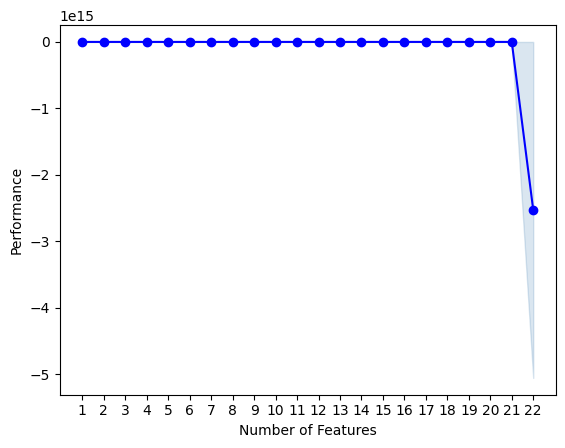

In [ ]:
sbs = SequentialFeatureSelector(LinearRegression(), forward=False,
                                k_features="best", scoring='neg_root_mean_squared_error')

backward_preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', sbs),
])

backward_preprocess_pipeline.fit(X_train, y_train)

print(f'feature combination {sbs.k_feature_idx_} gave best RMSE of {-sbs.k_score_:.0f}.\n')
display(pd.DataFrame.from_dict(sbs.get_metric_dict()).T)
plot_sfs(sbs.get_metric_dict(), kind='std_err');


### a. Random Forest

In [ ]:
processed_feature_names = preprocess_pipeline.named_steps['prep'].get_feature_names_out()

forward_selected_indices = sfs.k_feature_idx_
forward_selected_features = [processed_feature_names[i] for i in forward_selected_indices]

backward_selected_indices = sbs.k_feature_idx_
backward_selected_features = [processed_feature_names[i] for i in backward_selected_indices]

print("Forward Selected Features:", forward_selected_features)
print("Backward Selected Features:", backward_selected_features)


Forward Selected Features: ['num__is_weekend', 'num__temp', 'num__humidity', 'num__precip', 'num__windgust', 'num__windspeed', 'num__severerisk', 'cat__season_1', 'cat__season_3', 'cat__icon_partly-cloudy-day', 'cat__icon_wind']
Backward Selected Features: ['num__is_weekend', 'num__temp', 'num__humidity', 'num__precip', 'num__windgust', 'num__windspeed', 'num__cloudcover', 'num__severerisk', 'cat__season_1', 'cat__season_3', 'cat__icon_clear-day', 'cat__icon_partly-cloudy-day', 'cat__icon_rain']


In [ ]:
X_train_processed = preprocess_pipeline.named_steps['prep'].transform(X_train)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_feature_names, index=X_train.index)

X_test_processed = preprocess_pipeline.named_steps['prep'].transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=processed_feature_names, index=X_test.index)

# use Forward features
X_train_forward = X_train_processed_df[forward_selected_features]
X_test_forward = X_test_processed_df[forward_selected_features]

# use Backward features
X_train_backward = X_train_processed_df[backward_selected_features]
X_test_backward = X_test_processed_df[backward_selected_features]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

rf_model = RandomForestRegressor(random_state=42)

# train Forward model
rf_model.fit(X_train_forward, y_train)

y_pred_forward = rf_model.predict(X_test_forward)
r2_forward = r2_score(y_test, y_pred_forward)
rmse_forward = mean_squared_error(y_test, y_pred_forward, squared=False)

print("Forward Selection:")
print("Test Set R²:", r2_forward)
print("Test Set RMSE:", rmse_forward)

rf_model.fit(X_train_backward, y_train)

y_pred_backward = rf_model.predict(X_test_backward)
r2_backward = r2_score(y_test, y_pred_backward)
rmse_backward = mean_squared_error(y_test, y_pred_backward, squared=False)

print("\nBackward Selection:")
print("Test Set R²:", r2_backward)
print("Test Set RMSE:", rmse_backward)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Forward Selection:
Test Set R²: 0.788325834510534
Test Set RMSE: 1860.0662039642484

Backward Selection:
Test Set R²: 0.7963230777637099
Test Set RMSE: 1824.590400979456


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### b. XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

xgb_model.fit(X_train_forward, y_train)

y_pred_forward = xgb_model.predict(X_test_forward)
r2_forward = r2_score(y_test, y_pred_forward)
rmse_forward = mean_squared_error(y_test, y_pred_forward, squared=False)

print("Forward Selection with XGBoost:")
print("Test Set R²:", r2_forward)
print("Test Set RMSE:", rmse_forward)

# use backward feature to train
xgb_model.fit(X_train_backward, y_train)

y_pred_backward = xgb_model.predict(X_test_backward)
r2_backward = r2_score(y_test, y_pred_backward)
rmse_backward = mean_squared_error(y_test, y_pred_backward, squared=False)

print("\nBackward Selection with XGBoost:")
print("Test Set R²:", r2_backward)
print("Test Set RMSE:", rmse_backward)

Forward Selection with XGBoost:
Test Set R²: 0.7593235969543457
Test Set RMSE: 1983.4041882180234

Backward Selection with XGBoost:
Test Set R²: 0.7714962959289551
Test Set RMSE: 1932.5959101815265


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## iv. L2 Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('final_df.csv')
X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

categorical_cols = ['season', 'icon']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
prep_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

model_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('select', SelectFromModel(Ridge(alpha=1.0))),
    ('model', Ridge(alpha=1.0))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipe.fit(X_train, y_train)

selected_features = model_pipe['prep'].get_feature_names_out()[model_pipe['select'].get_support()]
print(f"Selected features: {selected_features}")

Selected features: ['num__temp' 'num__humidity' 'num__windgust' 'num__severerisk'
 'cat__season_1' 'cat__season_3' 'cat__season_4' 'cat__icon_clear-day'
 'cat__icon_partly-cloudy-day' 'cat__icon_wind']


### a. Random Forest

In [ ]:
selected_features = ['num__temp', 'num__humidity', 'num__windgust', 'num__severerisk',
                     'cat__season_1', 'cat__season_3', 'cat__season_4',
                     'cat__icon_clear-day', 'cat__icon_partly-cloudy-day', 'cat__icon_wind']

X_train_selected = model_pipe['prep'].transform(X_train)[:, model_pipe['select'].get_support()]
X_test_selected = model_pipe['prep'].transform(X_test)[:, model_pipe['select'].get_support()]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint
import numpy as np

rf_model = RandomForestRegressor(random_state=42)

param_distributions = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': uniform(0.01, 0.5),
    'min_samples_leaf': uniform(0.01, 0.5),
    'max_features': uniform(0.1, 0.9)
}

random_search_rf = RandomizedSearchCV(
    rf_model, param_distributions, n_iter=50, cv=5,
    scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

random_search_rf.fit(X_train_selected, y_train)

best_params_rf = random_search_rf.best_params_
best_score_rf = -random_search_rf.best_score_

y_pred_rf = random_search_rf.best_estimator_.predict(X_test_selected)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("best parameter:", best_params_rf)
print("best rating (-MSE):", best_score_rf)
print("test set R²:", r2_rf)
print("test set RMSE:", rmse_rf)


best parameter: {'max_depth': 16, 'max_features': 0.6504878444394528, 'min_samples_leaf': 0.013533152609858703, 'min_samples_split': 0.02153121252070788, 'n_estimators': 268}
best rating (-MSE): 4029806.641367618
test set R²: 0.7742443429075078
test set RMSE: 1920.9399770342177


### b. XGBoost

In [ ]:
selected_features = ['num__temp', 'num__humidity', 'num__windgust', 'num__severerisk',
                     'cat__season_1', 'cat__season_3', 'cat__season_4',
                     'cat__icon_clear-day', 'cat__icon_partly-cloudy-day', 'cat__icon_wind']

X_train_selected = model_pipe['prep'].transform(X_train)[:, model_pipe['select'].get_support()]
X_test_selected = model_pipe['prep'].transform(X_test)[:, model_pipe['select'].get_support()]


In [ ]:
param_distributions_xgb = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5)
}


In [ ]:
from scipy.stats import truncnorm

def trunc_uniform(low, high):
    return truncnorm((low - 0.5) / 0.1, (high - 0.5) / 0.1, loc=0.5, scale=0.1)

param_distributions_xgb = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': trunc_uniform(0.5, 1),
    'colsample_bytree': trunc_uniform(0.5, 1),
    'gamma': uniform(0, 0.5)
}


In [ ]:
random_search_xgb = RandomizedSearchCV(
    xgb_model,
    param_distributions_xgb,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    error_score=np.nan
)


In [ ]:
import numpy as np

# replace RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("best parameters:", best_params_xgb)
print("test set R²:", r2_xgb)
print("test set RMSE:", rmse_xgb)

best parameters: {'colsample_bytree': 0.9524111209059754, 'gamma': 0.025739375624994676, 'learning_rate': 0.09359393927098342, 'max_depth': 3, 'n_estimators': 178, 'subsample': 0.7156057016002751}
test set R²: 0.7908047437667847
test set RMSE: 1849.1425932353582


# **7. Model building and prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from scipy.stats import randint, uniform
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer


In [ ]:
data=pd.read_csv('final_df.csv')

## i. Decision Tree

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

categorical_cols = ['season', 'icon']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae, rmse,r2

(1931.9242902208202, 2500.459056906979, 0.61748317033404)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer
from scipy.stats import randint

pipeline.set_params(model=DecisionTreeRegressor(random_state=42))

param_grid = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': [None, 'sqrt', 'log2']
}

param_distributions = {
    'model__max_depth': randint(5, 50),
    'model__min_samples_split': randint(2, 20),
    'model__min_samples_leaf': randint(1, 10),
    'model__max_features': ['sqrt', 'log2', None]
}

param_distributions_bayesian = {
    'model__max_depth': Integer(5, 50),
    'model__min_samples_split': Integer(2, 20),
    'model__min_samples_leaf': Integer(1, 10),
    'model__max_features': Categorical(['sqrt', 'log2', None])
}

# Grid Search
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Random Search
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

# Bayesian Optimization
bayes_search = BayesSearchCV(
    pipeline, param_distributions_bayesian, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)
bayes_search.fit(X_train, y_train)

results = {
    'Grid Search': {
        'Best Params': grid_search.best_params_,
        'Best Score': -grid_search.best_score_
    },
    'Random Search': {
        'Best Params': random_search.best_params_,
        'Best Score': -random_search.best_score_
    },
    'Bayesian Optimization': {
        'Best Params': bayes_search.best_params_,
        'Best Score': -bayes_search.best_score_
    }
}

results


/opt/conda/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'Grid Search': {'Best Params': {'model__max_depth': 10,
   'model__max_features': None,
   'model__min_samples_leaf': 2,
   'model__min_samples_split': 10},
  'Best Score': 4489340.824683316},
 'Random Search': {'Best Params': {'model__max_depth': 23,
   'model__max_features': None,
   'model__min_samples_leaf': 8,
   'model__min_samples_split': 5},
  'Best Score': 4328155.236299625},
 'Bayesian Optimization': {'Best Params': OrderedDict([('model__max_depth',
                23),
               ('model__max_features', None),
               ('model__min_samples_leaf', 9),
               ('model__min_samples_split', 8)]),
  'Best Score': 4277770.95452223}}

In [ ]:
from sklearn.metrics import r2_score

best_grid_model = grid_search.best_estimator_
best_random_model = random_search.best_estimator_
best_bayes_model = bayes_search.best_estimator_

y_pred_grid = best_grid_model.predict(X_test)
y_pred_random = best_random_model.predict(X_test)
y_pred_bayes = best_bayes_model.predict(X_test)

# Calculate R² scores
r2_grid = r2_score(y_test, y_pred_grid)
r2_random = r2_score(y_test, y_pred_random)
r2_bayes = r2_score(y_test, y_pred_bayes)

r2_results = {
    'R² (Grid Search)': r2_grid,
    'R² (Random Search)': r2_random,
    'R² (Bayesian Search)': r2_bayes
}

r2_results


{'R² (Grid Search)': 0.7184075483141878,
 'R² (Random Search)': 0.7610455059262712,
 'R² (Bayesian Search)': 0.7537365988850544}

## ii. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

categorical_cols = ['season', 'icon']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(1363.1446372239748, 1757.2825894231994, 0.8110728972242492)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer, Real
from scipy.stats import randint, uniform


param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

param_distributions = {
    'model__n_estimators': randint(50, 300),
    'model__max_depth': randint(5, 50),
    'model__min_samples_split': randint(2, 20),
    'model__min_samples_leaf': randint(1, 10)
}

param_distributions_bayesian = {
    'model__n_estimators': Integer(50, 300),
    'model__max_depth': Integer(5, 50),
    'model__min_samples_split': Integer(2, 20),
    'model__min_samples_leaf': Integer(1, 10)
}

# Grid Search
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Random Search
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

# Bayesian Optimization
bayes_search = BayesSearchCV(
    pipeline, param_distributions_bayesian, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)
bayes_search.fit(X_train, y_train)

results = {
    'Grid Search': {
        'Best Params': grid_search.best_params_,
        'Best Score': -grid_search.best_score_
    },
    'Random Search': {
        'Best Params': random_search.best_params_,
        'Best Score': -random_search.best_score_
    },
    'Bayesian Optimization': {
        'Best Params': bayes_search.best_params_,
        'Best Score': -bayes_search.best_score_
    }
}
results

{'Grid Search': {'Best Params': {'model__max_depth': 10,
   'model__min_samples_leaf': 1,
   'model__min_samples_split': 2,
   'model__n_estimators': 200},
  'Best Score': 3250410.011293791},
 'Random Search': {'Best Params': {'model__max_depth': 48,
   'model__min_samples_leaf': 2,
   'model__min_samples_split': 11,
   'model__n_estimators': 239},
  'Best Score': 3269167.245001653},
 'Bayesian Optimization': {'Best Params': OrderedDict([('model__max_depth',
                39),
               ('model__min_samples_leaf', 2),
               ('model__min_samples_split', 7),
               ('model__n_estimators', 246)]),
  'Best Score': 3263290.9046929674}}

In [ ]:
from sklearn.metrics import r2_score

best_grid_model = grid_search.best_estimator_
best_random_model = random_search.best_estimator_
best_bayes_model = bayes_search.best_estimator_

y_pred_grid = best_grid_model.predict(X_test)
y_pred_random = best_random_model.predict(X_test)
y_pred_bayes = best_bayes_model.predict(X_test)

# Calculate R² scores
r2_grid = r2_score(y_test, y_pred_grid)
r2_random = r2_score(y_test, y_pred_random)
r2_bayes = r2_score(y_test, y_pred_bayes)

r2_results = {
    'R² (Grid Search)': r2_grid,
    'R² (Random Search)': r2_random,
    'R² (Bayes Search)': r2_bayes
}

r2_results

{'R² (Grid Search)': 0.8127910235416629,
 'R² (Random Search)': 0.8150489773930295,
 'R² (Bayes Search)': 0.8150007723654937}

In [ ]:
grid_cv_res = pd.DataFrame(grid_search.cv_results_)

In [ ]:
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,mean_test_score
29,10,1,2,200,-3.250410e+06
32,10,1,5,200,-3.252811e+06
42,10,2,10,50,-3.260805e+06
35,10,1,10,200,-3.264954e+06
41,10,2,5,200,-3.266705e+06
...,...,...,...,...,...
81,30,1,2,50,-3.323260e+06
63,20,2,2,50,-3.323599e+06
90,30,2,2,50,-3.324832e+06
9,None,2,2,50,-3.324832e+06


## iii. SVR

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

categorical_cols = ['season', 'icon']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)
# Complete pipeline with SVR
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(3353.9033556829254, 4024.650363813855, 0.00901434614418184)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from skopt import BayesSearchCV

param_grid = {
    'model__kernel': ['linear', 'poly', 'rbf'],
    'model__C': [0.1, 1, 10, 100],
    'model__epsilon': [0.01, 0.1, 0.5, 1]
}


param_distributions = {
    'model__kernel': ['linear', 'poly', 'rbf'],
    'model__C': uniform(0.1, 99.9),
    'model__epsilon': uniform(0.01, 0.99)
}

param_distributions_bayesian = {
    'model__kernel': Categorical(['linear', 'poly', 'rbf']),
    'model__C': Real(0.1, 100.0, prior='uniform'),
    'model__epsilon': Real(0.01, 1.0, prior='uniform')
}

# Grid Search
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Random Search
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

 #Bayesian Optimization
bayes_search = BayesSearchCV(
    pipeline, param_distributions_bayesian, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)
bayes_search.fit(X_train, y_train)

results = {
    'Grid Search': {
        'Best Params': grid_search.best_params_,
        'Best Score': -grid_search.best_score_
    },
    'Random Search': {
        'Best Params': random_search.best_params_,
        'Best Score': -random_search.best_score_
    },
    'Bayesian Optimization': {
        'Best Params': bayes_search.best_params_,
        'Best Score': -bayes_search.best_score_
    }
}




In [ ]:
from sklearn.metrics import r2_score

best_grid_model = grid_search.best_estimator_
best_random_model = random_search.best_estimator_
best_beyes_model = bayes_search.best_estimator_

y_pred_grid = best_grid_model.predict(X_test)
y_pred_random = best_random_model.predict(X_test)
y_pred_bayes = best_beyes_model.predict(X_test)

# Calculate R² scores
r2_grid = r2_score(y_test, y_pred_grid)
r2_random = r2_score(y_test, y_pred_random)
r2_bayes = r2_score(y_test, y_pred_bayes)

r2_results = {
    'R² (Grid Search)': r2_grid,
    'R² (Random Search)': r2_random,
    'R² (Bayes Search)': r2_bayes
}
r2_results

{'R² (Grid Search)': 0.56046912522666,
 'R² (Random Search)': 0.5604428681225471,
 'R² (Bayes Search)': 0.5584575292720758}

In [ ]:
grid_cv_res = pd.DataFrame(grid_search.cv_results_)

In [ ]:
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

,param_model__C,param_model__epsilon,param_model__kernel,mean_test_score
45,100.0,1.00,linear,-8.025081e+06
42,100.0,0.50,linear,-8.025297e+06
39,100.0,0.10,linear,-8.025550e+06
36,100.0,0.01,linear,-8.025607e+06
33,10.0,1.00,linear,-8.377648e+06
30,10.0,0.50,linear,-8.377746e+06
27,10.0,0.10,linear,-8.377822e+06
24,10.0,0.01,linear,-8.377848e+06
38,100.0,0.01,rbf,-9.339006e+06
41,100.0,0.10,rbf,-9.339019e+06


## iv. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

categorical_cols = ['season', 'icon']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Complete pipeline with Gradient Boosting
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(1344.1581177555413, 1745.4922441680194, 0.8135995746235428)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
#from skopt import BayesSearchCV

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.8, 1.0]
}

param_distributions = {
    'model__n_estimators': randint(50, 300),
    'model__learning_rate': uniform(0.01, 0.19),
    'model__max_depth': randint(3, 10),
    'model__min_samples_split': randint(2, 11),
    'model__min_samples_leaf': randint(1, 5),
    'model__subsample': uniform(0.8, 0.2)
}

param_distributions_bayesian = {
    'model__n_estimators': Integer(50, 300),
    'model__learning_rate': Real(0.01, 0.2, prior='uniform'),
    'model__max_depth': Integer(3, 10),
    'model__min_samples_split': Integer(2, 20),
    'model__min_samples_leaf': Integer(1, 10),
    'model__subsample': Real(0.8, 1.0, prior='uniform')
}

# Grid Search
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Random Search
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

# Bayesian Optimization
bayes_search = BayesSearchCV(
    pipeline, param_distributions_bayesian, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)
bayes_search.fit(X_train, y_train)

results = {
    'Grid Search': {
        'Best Params': grid_search.best_params_,
        'Best Score': -grid_search.best_score_
    },
    'Random Search': {
        'Best Params': random_search.best_params_,
        'Best Score': -random_search.best_score_
    },
    'Bayesian Optimization': {
        'Best Params': bayes_search.best_params_,
        'Best Score': -bayes_search.best_score_
    }
}


In [ ]:
from sklearn.metrics import r2_score

best_grid_model = grid_search.best_estimator_
best_random_model = random_search.best_estimator_
best_bayes_model = bayes_search.best_estimator_

y_pred_grid = best_grid_model.predict(X_test)
y_pred_random = best_random_model.predict(X_test)
y_pred_bayes = best_bayes_model.predict(X_test)

# Calculate R² scores
r2_grid = r2_score(y_test, y_pred_grid)
r2_random = r2_score(y_test, y_pred_random)
r2_bayes = r2_score(y_test, y_pred_bayes)

r2_results = {
    'R² (Grid Search)': r2_grid,
    'R² (Random Search)': r2_random,
    'R² (Bayes Search)': r2_bayes
}
r2_results

{'R² (Grid Search)': 0.8198658148997215,
 'R² (Random Search)': 0.8257729747250504,
 'R² (Bayes Search)': 0.8236358545415484}

In [ ]:
grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

,param_model__learning_rate,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,param_model__subsample,mean_test_score
390,0.10,5,1,10,50,0.8,-3.162620e+06
248,0.05,5,2,10,100,0.8,-3.169801e+06
218,0.05,5,1,2,100,0.8,-3.170389e+06
254,0.05,5,4,2,100,0.8,-3.170670e+06
260,0.05,5,4,5,100,0.8,-3.170670e+06
...,...,...,...,...,...,...,...
31,0.01,3,2,10,50,1.0,-9.887624e+06
37,0.01,3,4,2,50,1.0,-9.887624e+06
43,0.01,3,4,5,50,1.0,-9.887624e+06
49,0.01,3,4,10,50,1.0,-9.887624e+06


In [ ]:
y_pred_grid_train = best_grid_model.predict(X_train)
y_pred_random_train = best_random_model.predict(X_train)
y_pred_bayes_train = best_bayes_model.predict(X_train)

# Calculate R² scores for train set
r2_grid_train = r2_score(y_train, y_pred_grid_train)
r2_random_train = r2_score(y_train, y_pred_random_train)
r2_bayes_train = r2_score(y_train, y_pred_bayes_train)

r2_results = {
    'R² (Grid Search - Train)': r2_grid_train,
    'R² (Grid Search - Test)': r2_grid,
    'R² (Random Search - Train)': r2_random_train,
    'R² (Random Search - Test)': r2_random,
    'R² (Bayes Search - Train)': r2_bayes_train,
    'R² (Bayes Search - Test)': r2_bayes

}
r2_results

{'R² (Grid Search - Train)': 0.9182683862247805,
 'R² (Grid Search - Test)': 0.8198658148997215,
 'R² (Random Search - Train)': 0.8992308816978287,
 'R² (Random Search - Test)': 0.8257729747250504,
 'R² (Bayes Search - Train)': 0.9232814064771239,
 'R² (Bayes Search - Test)': 0.8236358545415484}

## v. XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

categorical_cols = ['season', 'icon']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42, eval_metric='rmse'))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(1470.8224907041724, 1890.6910494654958, 0.7812982797622681)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer, Real
from scipy.stats import uniform

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0]
}

param_distributions = {
    'model__n_estimators': randint(50, 300),
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.29),
    'model__subsample': uniform(0.5, 0.5)
}

param_distributions_bayesian = {
    'model__n_estimators': Integer(50, 300),
    'model__max_depth': Integer(3, 10),
    'model__learning_rate': Real(0.01, 0.3, prior='uniform'),
    'model__subsample': Real(0.5, 1.0, prior='uniform')
}


# Grid Search
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Random Search
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

# Bayesian Optimization
bayes_search = BayesSearchCV(
    pipeline, param_distributions_bayesian, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)
bayes_search.fit(X_train, y_train)

results = {
    'Grid Search': {
        'Best Params': grid_search.best_params_,
        'Best Score': -grid_search.best_score_
    },
    'Random Search': {
        'Best Params': random_search.best_params_,
        'Best Score': -random_search.best_score_
    },
    'Bayesian Optimization': {
        'Best Params': bayes_search.best_params_,
        'Best Score': -bayes_search.best_score_
    }
}



In [ ]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer
from scipy.stats import randint

best_grid_model = grid_search.best_estimator_
best_random_model = random_search.best_estimator_
best_bayes_model = bayes_search.best_estimator_

y_pred_grid = best_grid_model.predict(X_test)
y_pred_random = best_random_model.predict(X_test)
y_pred_bayes = best_bayes_model.predict(X_test)

# Calculate R² scores
r2_grid = r2_score(y_test, y_pred_grid)
r2_random = r2_score(y_test, y_pred_random)
r2_bayes = r2_score(y_test, y_pred_bayes)

r2_results = {
    'R² (Grid Search)': r2_grid,
    'R² (Random Search)': r2_random,
    'R² (Bayesian Search)': r2_bayes
}

r2_results


{'R² (Grid Search)': 0.8256784677505493,
 'R² (Random Search)': 0.8234094381332397,
 'R² (Bayesian Search)': 0.8215835690498352}

In [ ]:
grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,mean_test_score
31,0.10,3,100,0.8,-3.243108e+06
38,0.10,5,50,1.0,-3.244585e+06
36,0.10,5,50,0.6,-3.249097e+06
37,0.10,5,50,0.8,-3.268659e+06
56,0.20,3,50,1.0,-3.275691e+06
...,...,...,...,...,...
11,0.01,5,50,1.0,-9.027849e+06
9,0.01,5,50,0.6,-9.066981e+06
1,0.01,3,50,0.8,-9.918024e+06
0,0.01,3,50,0.6,-9.921170e+06


## vi. CatBoost

In [ ]:
from catboost import CatBoostRegressor
X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

categorical_cols = ['season', 'icon']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', CatBoostRegressor(random_seed=42, verbose=0))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(1316.720381769876, 1720.1871151493772, 0.8189650473047023)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
#from skopt import BayesSearchCV

param_grid = {
    'model__iterations': [100, 200, 500],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__depth': [4, 6, 8],
    'model__l2_leaf_reg': [1, 3, 5, 7],
    'model__border_count': [32, 64, 128],
    'model__bagging_temperature': [0.0, 0.5, 1.0]
}

from scipy.stats import uniform, randint

param_distributions = {
    'model__iterations': randint(100, 1000),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__depth': randint(3, 10),
    'model__l2_leaf_reg': uniform(1, 10),
    'model__border_count': randint(32, 128),
    'model__bagging_temperature': uniform(0.0, 2.0)
}

param_distributions_bayesian = {
    'model__iterations': Integer(100, 1000),
    'model__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'model__depth': Integer(3, 10),
    'model__l2_leaf_reg': Real(1, 10, prior='uniform'),
    'model__border_count': Integer(32, 128),
    'model__bagging_temperature': Real(0.0, 2.0, prior='uniform')
}

# Grid Search
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Random Search
random_search = RandomizedSearchCV(
    pipeline, param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

# Bayesian Optimization
bayes_search = BayesSearchCV(
    pipeline, param_distributions_bayesian, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)
bayes_search.fit(X_train, y_train)

results = {
    'Grid Search': {
        'Best Params': grid_search.best_params_,
        'Best Score': -grid_search.best_score_
    },
    'Random Search': {
        'Best Params': random_search.best_params_,
        'Best Score': -random_search.best_score_
    },
    'Bayesian Optimization': {
        'Best Params': bayes_search.best_params_,
        'Best Score': -bayes_search.best_score_
    }
}


In [ ]:
from sklearn.metrics import r2_score

best_grid_model = grid_search.best_estimator_
best_random_model = random_search.best_estimator_
best_bayes_model = bayes_search.best_estimator_

y_pred_grid = best_grid_model.predict(X_test)
y_pred_random = best_random_model.predict(X_test)
y_pred_bayes = best_bayes_model.predict(X_test)

# Calculate R² scores
r2_grid = r2_score(y_test, y_pred_grid)
r2_random = r2_score(y_test, y_pred_random)
r2_bayes = r2_score(y_test, y_pred_bayes)

r2_results = {
    'R² (Grid Search)': r2_grid,
    'R² (Random Search)': r2_random,
    'R² (Bayes Search)': r2_bayes
}
r2_results

{'R² (Grid Search)': 0.83273238931096,
 'R² (Random Search)': 0.8146219184484982,
 'R² (Bayes Search)': 0.8338366464470223}

In [ ]:
grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

,param_model__bagging_temperature,param_model__border_count,param_model__depth,param_model__iterations,param_model__l2_leaf_reg,param_model__learning_rate,mean_test_score
589,0.5,128,6,200,1,0.05,-3.099162e+06
265,0.0,128,6,200,1,0.05,-3.099162e+06
913,1.0,128,6,200,1,0.05,-3.099162e+06
481,0.5,64,6,200,1,0.05,-3.103609e+06
805,1.0,64,6,200,1,0.05,-3.103609e+06
...,...,...,...,...,...,...,...
513,0.5,64,8,100,7,0.01,-7.548299e+06
837,1.0,64,8,100,7,0.01,-7.548299e+06
729,1.0,32,8,100,7,0.01,-7.587091e+06
81,0.0,32,8,100,7,0.01,-7.587091e+06


## vii. Stacking Process

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = data.drop(columns=['total_pickup', 'date'])
y = data['total_pickup']

categorical_cols = ['season', 'icon']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

base_models = [
    ('decision_tree', Pipeline([
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(max_depth=5, random_state=42))
    ])),
    ('random_forest', Pipeline([
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ])),
    ('svr', Pipeline([
        ('preprocessor', preprocessor),
        ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1))
    ])),
    ('gradient_boosting', Pipeline([
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ])),
    ('xgboost', Pipeline([
        ('preprocessor', preprocessor),
        ('model', XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse'))
    ])),
    ('catboost', Pipeline([
        ('preprocessor', preprocessor),
        ('model', CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, verbose=0))
    ])),

]

meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Stacking Model Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Stacking Model Performance:
MAE: 1275.9465897230543
RMSE: 1664.76191575763
R²: 0.8304431590907463


## viii. Model conclusion:


Based on the model results, the key findings are as follows:

i.	**Best Model:**

The CatBoost model with Bayesian Optimization tuning performed the best, achieving an R² score of 0.834, making it the most effective method.

ii.	**Performance by Models:**

Gradient Boosting and XGBoost also performed well, but they fell slightly short compared to CatBoost.

The stacking method combined the strengths of individual models, achieving a high R² score of 0.8304, but it was not better than CatBoost.

iii.	**Effectiveness of Tuning Methods:**

Bayesian Optimization consistently yielded better performance compared to Grid Search and Random Search, particularly for complex models like CatBoost.

Random Search showed competitive results with less computational effort than Grid Search.

iv.	**SVR Model Observations:**

SVR underperformed significantly in both original and tuned configurations, likely due to the nature of the data and model assumptions.

v. **Summary of Results:**

The CatBoost model tuned using Bayesian Optimization emerged as the best-performing model, indicating its robustness in handling the dataset and capturing complex patterns effectively. Stacking provided good results but did not surpass the best individual model. Bayesian Optimization proved to be the most efficient hyperparameter tuning method overall.

# **8. Conclusions**

i. **Relationship Between Weather and Bikeshare Usage**

Weather plays a significant role in influencing bikeshare usage. Favorable weather conditions, such as moderate temperatures, clear skies, and low precipitation, tend to increase demand for bikeshare services. Conversely, extreme weather conditions, including heavy rain, snow, or high temperatures, can significantly reduce ridership. Integrating weather data into predictive models allows for more accurate forecasting of daily and station-level demand.

ii. **Station Daily Imbalance**

Station imbalance is a critical operational challenge in bikeshare systems. Certain stations experience a higher number of pick-ups than drop-offs, leading to bike shortages or dock overcrowding. These imbalances are often influenced by the station’s location (e.g., residential areas vs. commercial zones) and time of day (e.g., commute hours). Identifying and addressing these imbalances through dynamic rebalancing strategies can improve system efficiency and user satisfaction.

iii. **Predictive Model of Daily Demand**

Building predictive models for daily bikeshare demand involves analyzing historical data, including weather, station usage patterns, and temporal trends. Machine learning algorithms, such as Random Forests, Gradient Boosting, or XGBoost, can effectively predict daily ridership. These models can provide valuable insights for resource allocation, operational planning, and optimizing user experience.

# **9. Challenges**

i. **Large and Messy Dataset :**

Our dataset comprises four datasets, including daily_rent_detail, which contains over 14 million rows, and weather data with more than 30 columns. As a result, data cleaning and modeling often lead to runtime errors due to the sheer size and complexity of the data.

**Solution:**

We applied various techniques to handle the large dataset. For example, we randomly sampled a proportion of the original dataset to perform exploratory data analysis (EDA) on a subset of the data. Additionally, when running machine learning models, we reduced the number of grid search iterations to ensure the models could execute successfully.

ii. **Excessive Repetition or Similarity in Features :**

The dataset contains a large number of repeated or highly similar columns, which can lead to feature duplication, negatively impacting model accuracy or causing inefficient resource utilization.

**Solution:**

To address this issue, we first removed columns that were clearly irrelevant or redundantly meaningful. After this initial feature screening, we applied four advanced feature selection techniques to systematically evaluate and eliminate redundant features, ensuring the model is more balanced and interpretable.

iii. **Necessity of Feature Engineering :**

The columns in the raw dataset lack sufficient meaningful features to capture patterns in bike rental behavior.

**Solution:**

To address this issue, we created new features to better analyze bike rental patterns and enhance the predictive capability of the model. For example, we derived variables based on time periods, such as "Season," "Is_Holiday," and "Is_Weekend." We also generated weather-based features to enrich the dataset with relevant new attributes.

These features were subsequently used in feature selection to improve the accuracy of the model's predictions.



# **10. Future Steps**

i. **Collecting More Individual Station Information:**

In addition to factors that influence the overall bike-share system, such as weather, holidays, and seasons, many characteristics specific to individual stations may also affect bike-share demand.

Therefore, we can consider incorporating additional factors, such as the number of attractions, schools, and shopping malls near a station, or the availability of alternative transportation options in the area. Including these variables in the analysis can lead to more accurate demand predictions for each station.

ii. **Predicting the Imbalance in Bike Rentals at Individual Stations:**

In our project, we have focused on forecasting the pick-up volume of bike rentals. By further predicting the drop-off volume, we can estimate the imbalance at each station.

This will enable operators to precisely identify when a station needs additional bikes or when there will be an oversupply of bikes. Such insights can help optimize bike transportation management and enhance the user experience.

In [ ]:
# Install required packages for PDF conversion -- could take over a minute
!apt update > /dev/null 2>&1
!apt install texlive-xetex pandoc > /dev/null 2>&1
!pip install nbconvert > /dev/null 2>&1

In [1]:
import pandas as pd

# Mount google drive to access your notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re, pathlib, shutil
notebook_path = '/content/drive/MyDrive/Colab Notebooks' # ← CHANGE THIS TO THE FOLDER ON GOOGLE DRIVE WITH YOUR COLAB NOTEBOOK
notebook_name = 'A06-Demand Prediction and Optimization of Capital BikeShare System in Washington, D.C.ipynb' # ← CHANGE THIS TO THE NAME OF YOUR COLAB NOTEBOOK
!jupyter nbconvert "{notebook_path}/{notebook_name}" --to pdf --output-dir "{notebook_path}"

# Optionally, download the exported PDF
from google.colab import files
pdf_name = notebook_path + '/' + notebook_name.replace('.ipynb', '.pdf')
files.download(pdf_name)


[NbConvertApp] WARNING | pattern '/MyDrive/Colab Notebooks/A06-Demand Prediction and Optimization of Capital BikeShare System in Washington, D.C.ipynb' matched no files
[NbConvertApp] Making directory /MyDrive/Colab Notebooks
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: 

FileNotFoundError: Cannot find file: /MyDrive/Colab Notebooks/A06-Demand Prediction and Optimization of Capital BikeShare System in Washington, D.C.pdf